<font size=3 color='blue'>
    
  # <center>Clase 2: septiembre 30 de 2020</center> 

<font size=2 color='blue'>
    
# Generación de las muestras

<font size=5 >

1.  Se genera un conjunto de numeros aleatorios ($(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$)

In [48]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Se modelan un conjunto de datos (muestras). Estos datos se pueden sustituir por datos 
# medidos experimentalmente, los cuales simplemente serán leídos.

def generador_datos_simple(beta, m, desviacion):
    
    '''Esta función genera un conjunto de m puntos aleatorios
        INPUT: 
            beta:pendiente
            m: numero de muestras generadas
            desviación: es el error simulado
        OUTPUT: 
            conjunto de puntos x, y'''
    
    np.random.seed(3)                          # seed permite fijar una semilla para obtener valores reproducibles
    x = np.random.random(m) * 100              # x es arreglo con m numeros aleatorios entre [0, 100)
    e = np.random.randn(m) * desviacion        # e es un arreglo de 'errores' generado aleatoriamente
    y = x * beta + e                           # x*beta genera una recta de pendiente beta,  
                                               # sumando los errores, e, se alejan los puntos de la recta.
    
    return x.reshape((m,1)), y.reshape((m,1))
 

[seed()](https://www.w3schools.com/python/ref_random_seed.asp)

[numpy.random.random()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random.html)

[np.random.randn()](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)

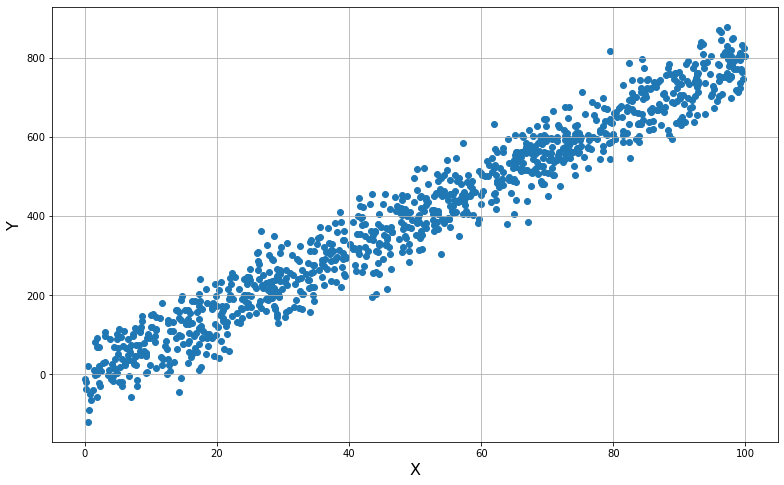

In [3]:
desviacion = 50
beta = 8
m = 1000

x, y = generador_datos_simple(beta, m, desviacion)

plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)
plt.scatter(x, y);

<font size=2 color='blue'>

# Buscando la correlación entre las muestras:



<font size=4>

Se tiene un conjunto de m muestras (puntos) $(x_i, y_i)$, y se busca encontrar una función F que describa una posible correlación entre ellos.

Analicemos un problema en donde los valores de $y_i$ dependen de los valores de $x_i$. 

Para encontrar esta función, inicialmente se propone un conjunto de funciones definidas todas ellas por misma relación funcional de un conjunto de parámetros (variables). Cada función es definida por valores específicos de estos parámetros.

Por ejemplo, la relación funcional $$f(x) = b + w x$$ $$ $$define de manera general a todas las funciones que describen una recta en el plano $x-y$. $$ $$En especial la función 

$$f = 0.0 + 2.0 x$$


define a una recta que corta al eje $y$ en 0.0 y tiene una pendiente de 2.0. 

Mientras que la función $$f = 10.0 + 8.0x,$$ 
$$ $$ define una recta que corta al eje $y$ en 10.0 y tiene una pendiente de 8.0.

En el presente problema, para encontrar la correlación entre las muestras, proponemos un conjunto de funciones definidas mediante la siguiente relación lineal:

$$ f(x, w, b) = b + w x $$
  
Vemos que esta relación funcional es derivable respecto a todas sus variables, x, w, b.
La letra w se emplea como abreviación de la palabra en inglés "weight", porque se relaciona con la importancia que tiene la variable x en el valor de la función f. La letra b es la abreviación de la palabra "bias" en inglés, y se refiere a la referencia respecto a cero de la función f.


<font size = 4>

Para encontrar la función que describe la correlación entre los puntos, es necesario generar una métrica para describir qué tanto se acerca cada una de las funciones específicas (con valores definidos de w y de b) a esta descripción.

La métrica que se propone es la siguiente: $$ $$

Para cada muestra $(x_i, y_i)$ se evalua $f(x_i)$ y se compara con el correspondiente valor $y_i$, la diferencia entre estos valores se eleva al cuadrado. $$ (f(x_i)-y_i)^{2}$$


Finalmente se calcula el promedio de este valor sobre todas las muestras, el cual definimos como resiudo. En Machine Learning en lugar del término residuo algunos autores emplean el término gasto.

Si m es el número de muestras, el residuo queda como:

$$ Residuo = \dfrac {1}{m}∑_{i=1}^{m}(f(x_i)-y_i)^{2} $$

siendo m el número de muestras.


___

<font size=4>

A continuación revisaremos algunas formas de abordar el problema.


<font size=4, color='blue'>
    
> ### a) A prueba y error observando la gráfica de la función f
    
#### En el siguiente código se implementa la generación del residuo dada una función específica definido por los pesos iniciales w = weight_0, y b = bias_0.

<font size =4>
    

### 1. Los parámetros w y b se eligen al azar: 

``` python 

weight_0 = random.randrange(0, 10)

bias_0 = random.randrange(0, 100)

```

[random.randrange()](https://www.w3schools.com/python/ref_random_randrange.asp) ---> returns a randomly selected element from the specified range.

In [4]:
random.seed(3) # Se fija una semilla para obtener valores reproducibles

# Se inicialilzan las variables de la función:

weight_0 = random.randrange(0, 10)
bias_0 = random.randrange(0, 100)

print('weight_0:', weight_0, '\n', 
      'bias_0:', bias_0)

weight_0: 3 
 bias_0: 75


<font size=4>

### 2. Se grafica la correspondiente función f, junto con los puntos que representan a las muestras

residuo:   53711.82


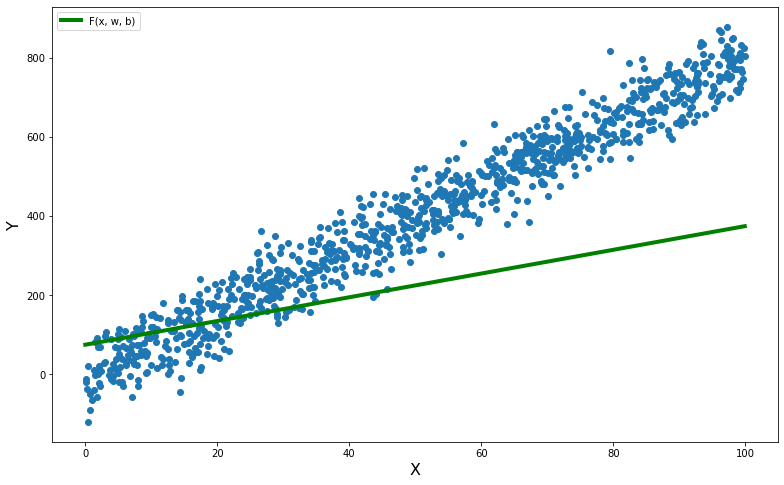

In [5]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(0, 100, 0.1) # genera el conjunto de valores que inicia en 0, termina en 100 y va en pasos de 0.1
y_ = weight_0*x_ + bias_0   # se evalua cada punto de x_ en la funcion f(x)=wx+b

# usando la función f, el residuo se calcula al compara los valores medidos y los valores calculados
residuo = 0
for i in range(len(x)):
    r = (y[i]-weight_0*x[i] - bias_0)**2
    residuo += np.squeeze(r)
residuo = residuo/len(x)
print('residuo: {0:10.2f}'.format(residuo))


# Se grafica la funcion f y las muestras (puntos)
plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

#Plotting function
plt.plot(x_, y_, color='green', lw=4, label='F(x, w, b)')
plt.legend()

#Plotting samples
plt.scatter(x, y);

<font size=4>

Como se observa en la gráfica, esta función está lejos de describir la correlación entre los puntos. 


<font color='blue'>
    

#### Los valores del peso *w* y el bias *b* se actualizan iterativamente a prueba y error. Para ello se deben hacer los cambios de acuedo a la gráfica (residuo) que se obtenga.

In [6]:
def update_weights_biases(weight, bias, value_to_update_weight, value_to_update_bias):
    
    '''Esta función actualiza los valores de w y b y calcula el respectivo residuo
    
    INPUT:
        weight: peso actual
        bias: bias actual
        value_to_update_weight: valor a agregar para actualizar el peso
        value_to_update_bias: valor a agregar para actualizar el bias
    OUTPUT:
        weigth: el peso actualizado
        bias: el bias actualizado
        residuo: el residuo que se genera con la nueva función f con el peso y bias actualizados'''
    
    # Actualización de peso y bias:
    weight = weight + value_to_update_weight
    bias = bias + value_to_update_bias

    #The following date are for constructing the F(x,weight, bias)
    x_ = np.array([0, 100])
    y_ = weight*x_ + bias           # se calcula la nueva función f

    # se grafica la nueva función f y las muestras:
    plt.figure(figsize=(13,8))
    plt.ylabel('Y', fontsize=16)
    plt.xlabel('X', fontsize=16)
    
    # grafica de f
    plt.plot(x_, y_, 'orchid', lw=4, label='F(x,w,b)')
    plt.legend()

    # grafica de las muestras
    plt.scatter(x, y);
    
    # calculo del residuo:
    residuo = 0
    for i in range(len(x)):
        r = (y[i]- weight*x[i] - bias)**2
        residuo += np.squeeze(r)   
    residuo = residuo/len(x)
    print('residuo: {:10.2f}'.format(residuo))
         
    return weight, bias, residuo

residuo:   33859.31


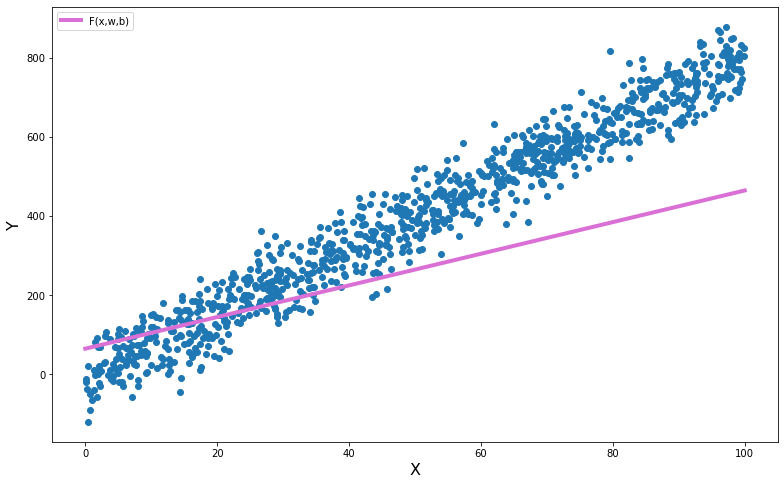

In [7]:
weight_1, bias_1, residuo_1 = update_weights_biases(weight_0, bias_0, 1, -10.0)

<font size=4>

Se comparan las dos graficas anteriores, es decir, $f(x)=w_0 x + b_0$ con $f(x)=w_1 x + b_1$

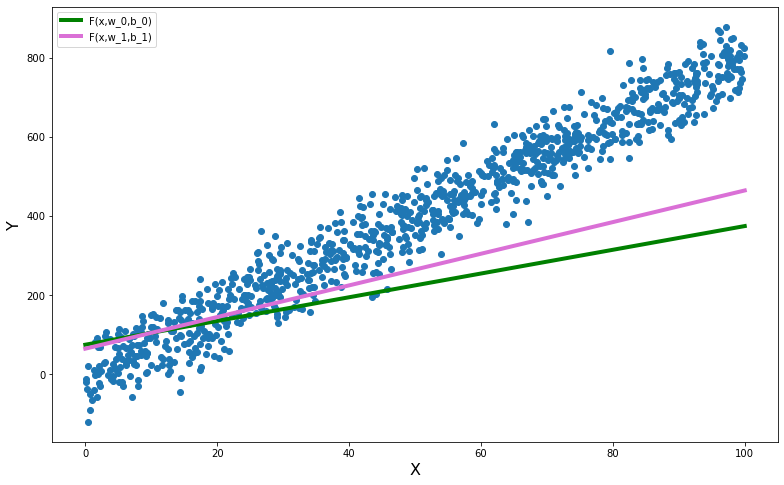

In [8]:
x_ = np.array([0, 100])
y_0 = weight_0*x_ + bias_0     # función inicial
y_1 = weight_1*x_ + bias_1     # función actualizada


plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

#Grafica de las funciones:
plt.plot(x_, y_0, 'green', lw=4, label='F(x,w_0,b_0)')
plt.plot(x_, y_1, 'orchid', lw=4, label='F(x,w_1,b_1)')
plt.legend()
# grafica de las muestras:
plt.scatter(x, y);

<font size=4>

El cambio es muy pequeño, por lo que se actualizara al peso con 2.0 y el bias a -100.0. 

residuo:   23705.74


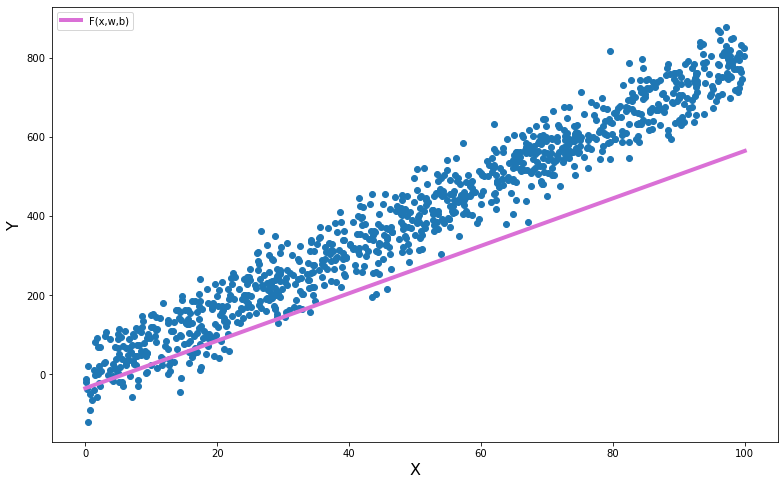

In [9]:
weight_2, bias_2, residuo_2 = update_weights_biases(weight_1, bias_1, 2, -100.0)

<font size=4>

Se compara con la versión anterior

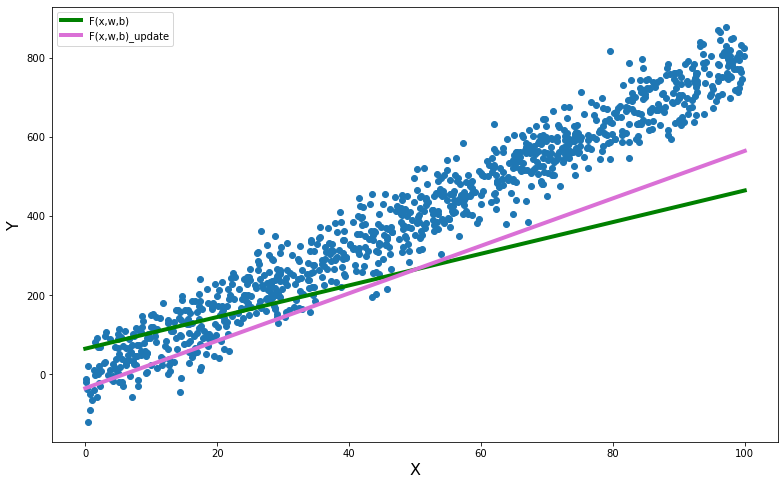

In [10]:
x_ = np.array([0, 100])
y_1 = weight_1*x_ + bias_1
y_2 = weight_2*x_ + bias_2


plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.plot(x_, y_1, 'green', lw=4, label='F(x,w,b)')
plt.plot(x_, y_2, 'orchid', lw=4, label='F(x,w,b)_update')
plt.legend()

plt.scatter(x, y);

<font size=4>

Aún se puede mejorar aumentando el peso (pendiente):

residuo:    6116.01


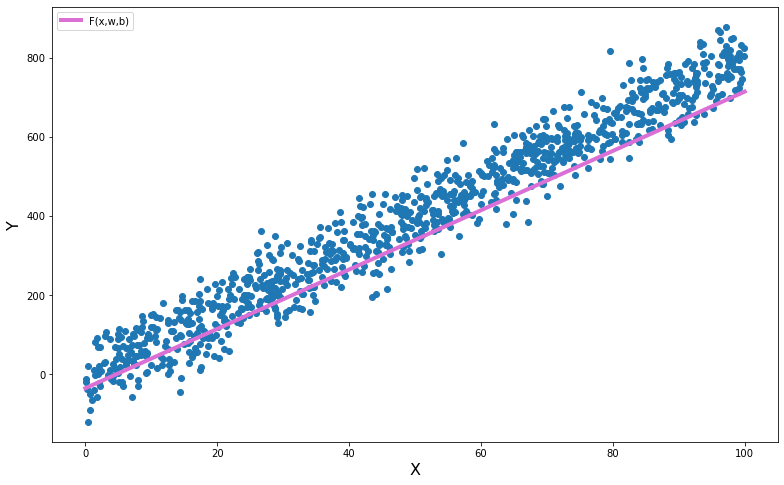

In [11]:
weight_3, bias_3, residuo_3 = update_weights_biases(weight_2, bias_2, 1.5, 0.0)

<font size=4>

Se comparan las dos graficas anteriores

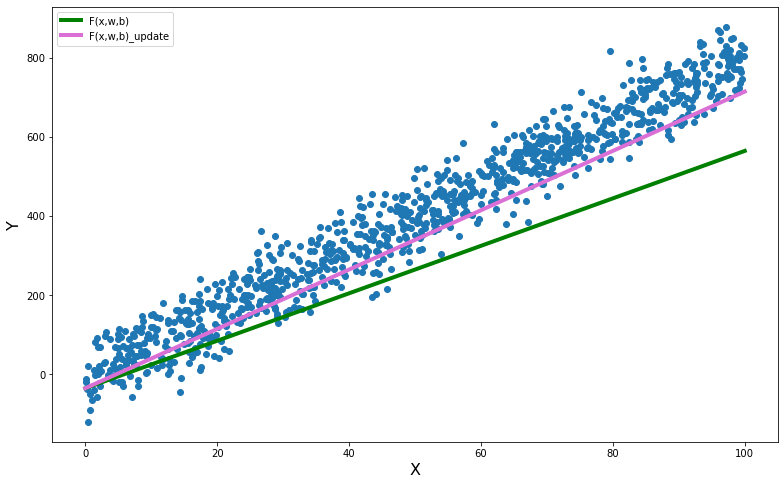

In [12]:
x_ = np.array([0, 100])
y_2 = weight_2*x_ + bias_2
y_3 = weight_3*x_ + bias_3


plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.plot(x_, y_2, 'green', lw=4, label='F(x,w,b)')
plt.plot(x_, y_3, 'orchid', lw=4, label='F(x,w,b)_update')
plt.legend()

plt.scatter(x, y);

<font size=4>

Se prueba aumentando la pendiente un poco mas:

residuo:    3628.16


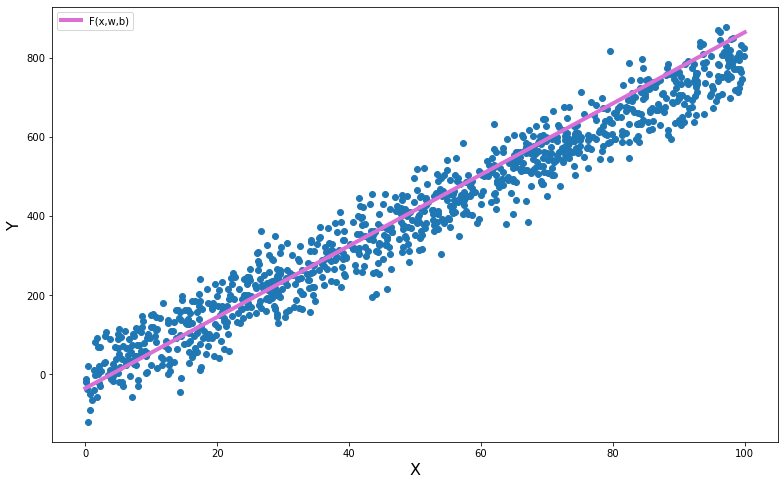

In [13]:
weight_4, bias_4, residuo_4 = update_weights_biases(weight_3, bias_3, 1.5, 0.0)

<font size=4>

Comparación con la función anterior:

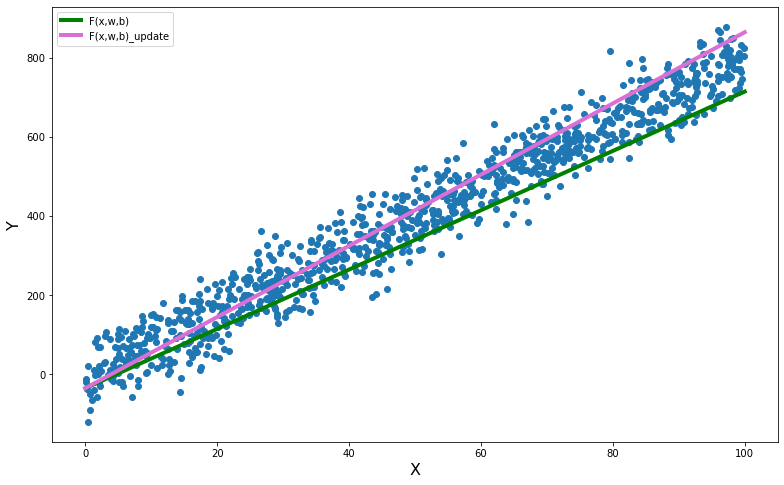

In [14]:
x_ = np.array([0, 100])
y_3 = weight_3*x_ + bias_3
y_4 = weight_4*x_ + bias_4


plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.plot(x_, y_3, 'green', lw=4, label='F(x,w,b)')
plt.plot(x_, y_4, 'orchid', lw=4, label='F(x,w,b)_update')
plt.legend()

plt.scatter(x, y);

<font size=4>

El residuo aumento en comparacion con la ultima versión por lo que ahora es conveniente disminuir la pendiente.

residuo:    3595.99


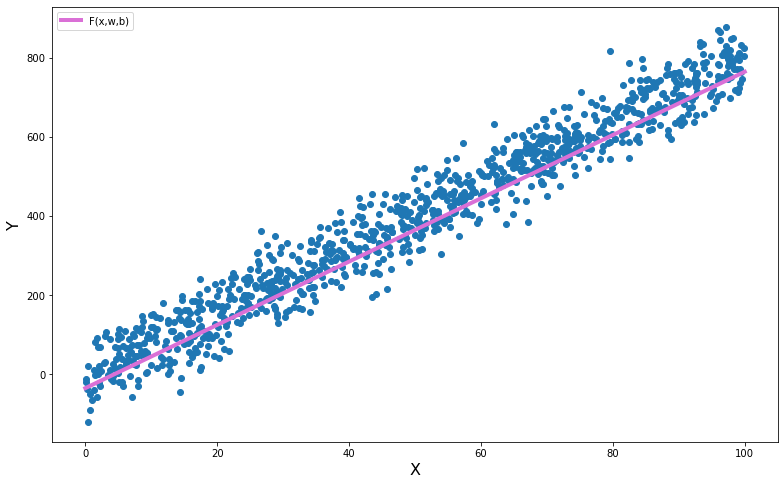

In [15]:
weight_5, bias_5, residuo_5 = update_weights_biases(weight_4, bias_4, -1.0, 0.2)

<font size=4>

Comparación con la función anterior:

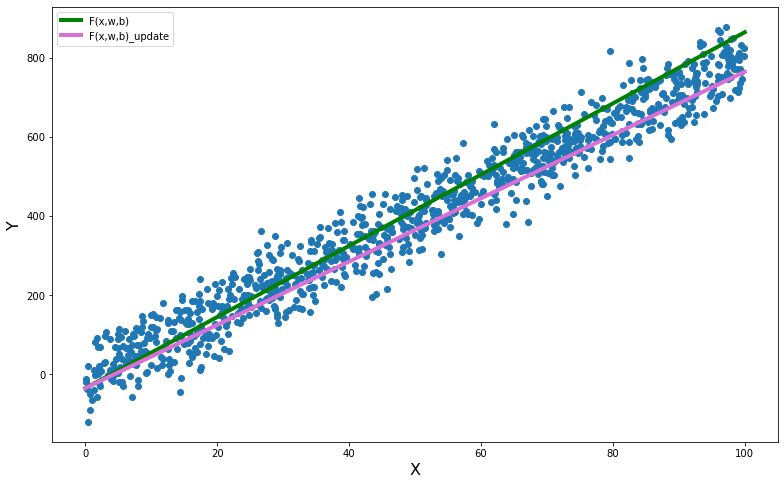

In [16]:
x_ = np.array([0, 100])
y_4 = weight_4*x_ + bias_4
y_5 = weight_5*x_ + bias_5


plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.plot(x_, y_4, 'green', lw=4, label='F(x,w,b)')
plt.plot(x_, y_5, 'orchid', lw=4, label='F(x,w,b)_update')
plt.legend()

plt.scatter(x, y);

residuo:    3635.61


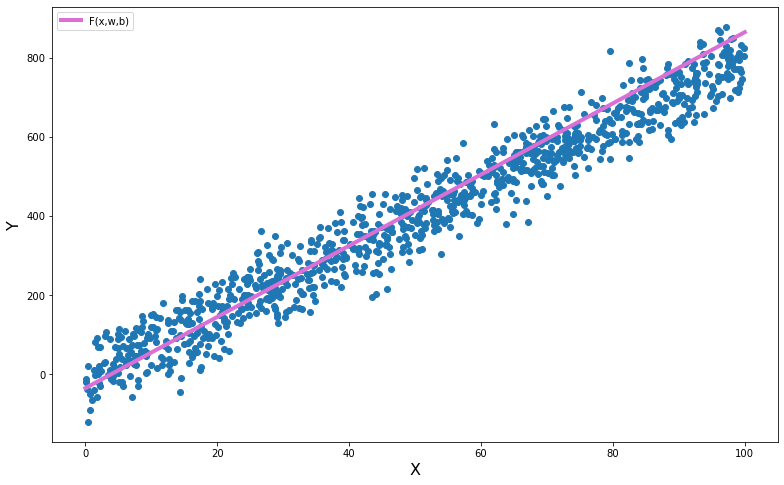

In [17]:
weight_6, bias_6, residuo_6 = update_weights_biases(weight_5, bias_5, 1.0, 0.0)

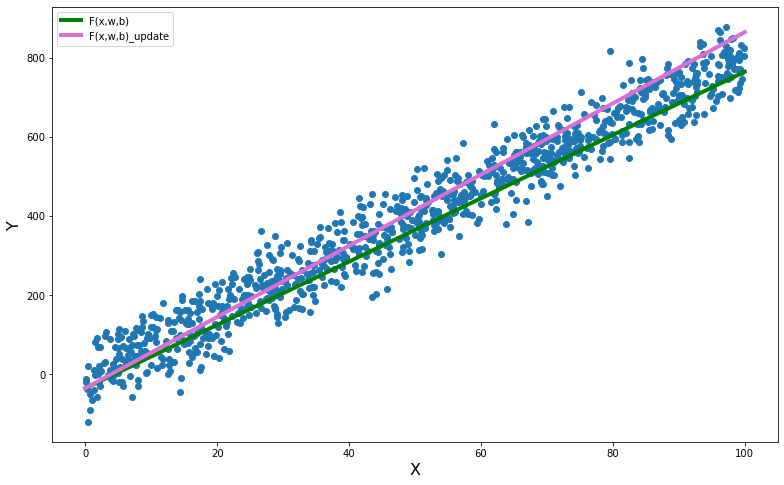

In [18]:
x_ = np.array([0, 100])
y_5 = weight_5*x_ + bias_5
y_6 = weight_6*x_ + bias_6


plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.plot(x_, y_5, 'green', lw=4, label='F(x,w,b)')
plt.plot(x_, y_6, 'orchid', lw=4, label='F(x,w,b)_update')
plt.legend()

plt.scatter(x, y);

<font size=4 color='red'>

#### Se puede mejorar, la idea es observar el cambio en el residuo con los cambios en la pendiente w y en b.

___

<font size=4 color='blue'>

> ### b) Buscando el resudio mínimo

#### Busquemos encontrar la función que defina la correlación generando un conjunto de funciones y calcular los correspondientes residuos.

In [19]:
residuo= 0

for i in range(len(x)):
    r = (y[i]-weight_0*x[i]- bias_0)**2
    residuo += np.squeeze(r)
residuo = residuo/len(x)

print('residuo: {0:10.2f}'.format(residuo))

residuo:   53711.82


<font size=4>

La función **update_weight_bias()** actualiza a los parametros weight y bias, y calcula el residuo.

> ### Primero vamos a dejar fija a b y vamos a variar a w.

residuo:   80411.34
weight:       3.20 bias:      -3.00 residuo:   80411.34
residuo:   74081.13
weight:       3.40 bias:      -3.00 residuo:   74081.13
residuo:   68019.39
weight:       3.60 bias:      -3.00 residuo:   68019.39
residuo:   62226.12
weight:       3.80 bias:      -3.00 residuo:   62226.12
residuo:   56701.34
weight:       4.00 bias:      -3.00 residuo:   56701.34
residuo:   51445.03
weight:       4.20 bias:      -3.00 residuo:   51445.03
residuo:   46457.21
weight:       4.40 bias:      -3.00 residuo:   46457.21
residuo:   41737.86
weight:       4.60 bias:      -3.00 residuo:   41737.86
residuo:   37286.98
weight:       4.80 bias:      -3.00 residuo:   37286.98
residuo:   33104.59
weight:       5.00 bias:      -3.00 residuo:   33104.59
residuo:   29190.67
weight:       5.20 bias:      -3.00 residuo:   29190.67
residuo:   25545.23
weight:       5.40 bias:      -3.00 residuo:   25545.23
residuo:   22168.27
weight:       5.60 bias:      -3.00 residuo:   22168.27
residuo:   1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    3857.13
weight:       7.40 bias:      -3.00 residuo:    3857.13


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    3164.95
weight:       7.60 bias:      -3.00 residuo:    3164.95
residuo:    2741.25
weight:       7.80 bias:      -3.00 residuo:    2741.25


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    2586.02
weight:       8.00 bias:      -3.00 residuo:    2586.02
residuo:    2699.27
weight:       8.20 bias:      -3.00 residuo:    2699.27


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    3081.00
weight:       8.40 bias:      -3.00 residuo:    3081.00
residuo:    3731.21
weight:       8.60 bias:      -3.00 residuo:    3731.21


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    4649.89
weight:       8.80 bias:      -3.00 residuo:    4649.89
residuo:    5837.06

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



weight:       9.00 bias:      -3.00 residuo:    5837.06
residuo:    7292.70
weight:       9.20 bias:      -3.00 residuo:    7292.70


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    9016.82
weight:       9.40 bias:      -3.00 residuo:    9016.82
residuo:   11009.41

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



weight:       9.60 bias:      -3.00 residuo:   11009.41
residuo:   13270.49
weight:       9.80 bias:      -3.00 residuo:   13270.49


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   15800.04
weight:      10.00 bias:      -3.00 residuo:   15800.04


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   18598.07
weight:      10.20 bias:      -3.00 residuo:   18598.07


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   21664.58
weight:      10.40 bias:      -3.00 residuo:   21664.58
residuo:   24999.57
weight:      10.60 bias:      -3.00 residuo:   24999.57
residuo:   28603.03

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



weight:      10.80 bias:      -3.00 residuo:   28603.03


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   32474.97
weight:      11.00 bias:      -3.00 residuo:   32474.97
residuo:   36615.39

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



weight:      11.20 bias:      -3.00 residuo:   36615.39


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   41024.29
weight:      11.40 bias:      -3.00 residuo:   41024.29
residuo:   45701.67
weight:      11.60 bias:      -3.00 residuo:   45701.67


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   50647.52
weight:      11.80 bias:      -3.00 residuo:   50647.52


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   55861.85
weight:      12.00 bias:      -3.00 residuo:   55861.85
residuo:   61344.66
weight:      12.20 bias:      -3.00 residuo:   61344.66


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   67095.95
weight:      12.40 bias:      -3.00 residuo:   67095.95


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   73115.71
weight:      12.60 bias:      -3.00 residuo:   73115.71
residuo:   79403.96
weight:      12.80 bias:      -3.00 residuo:   79403.96


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   85960.68
weight:      13.00 bias:      -3.00 residuo:   85960.68


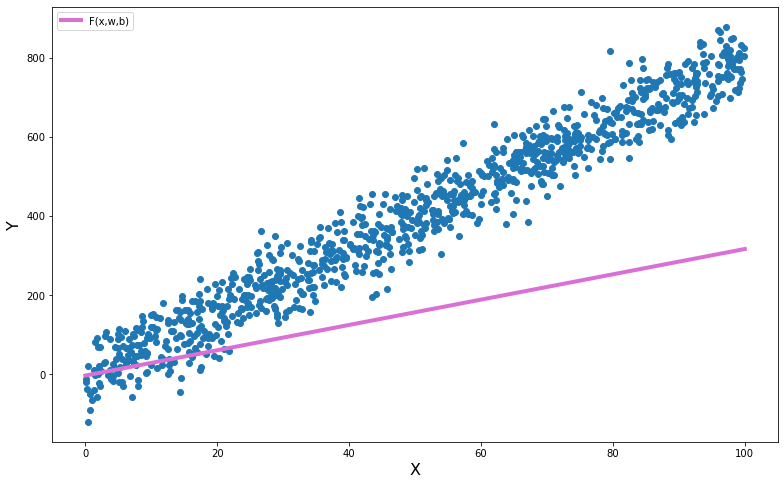

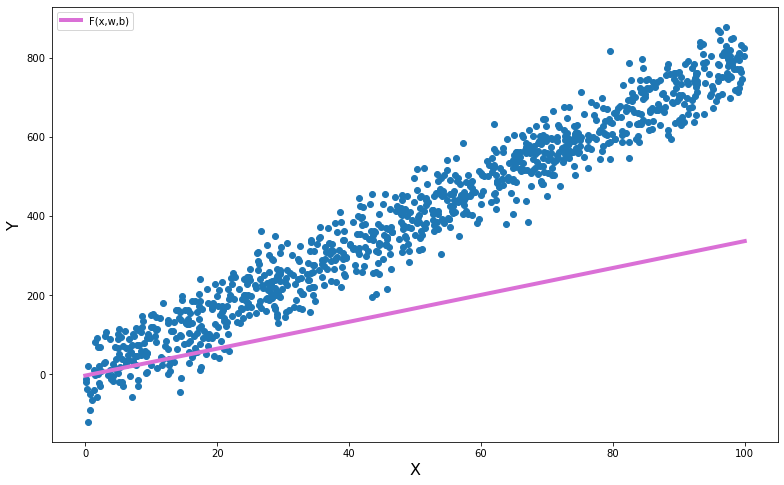

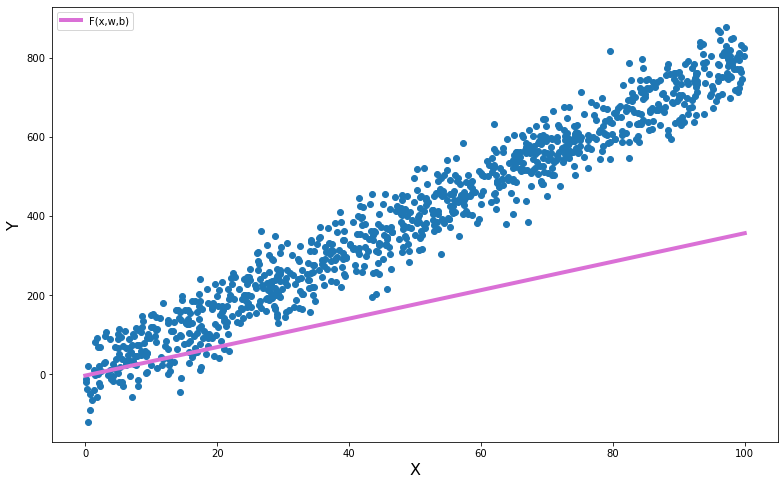

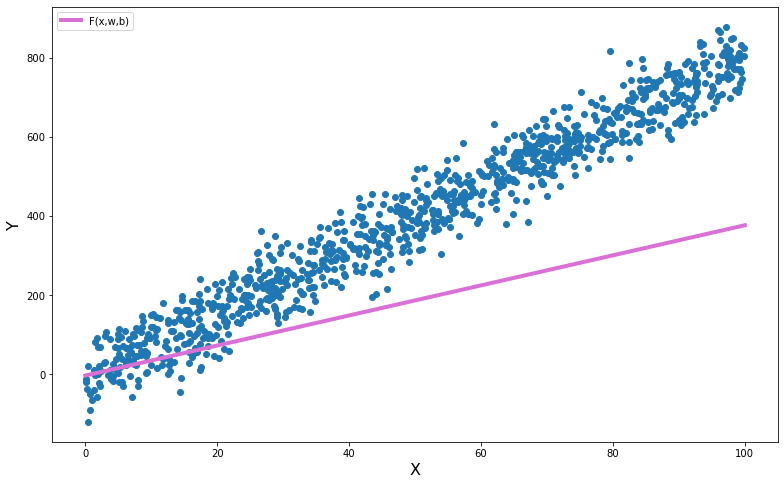

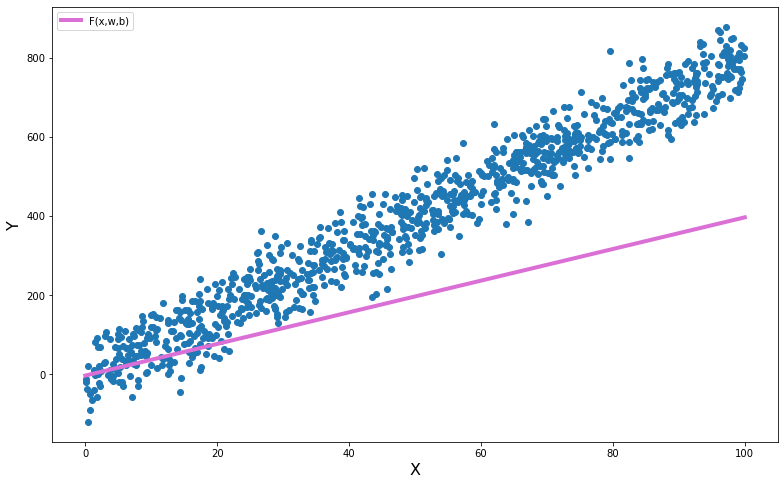

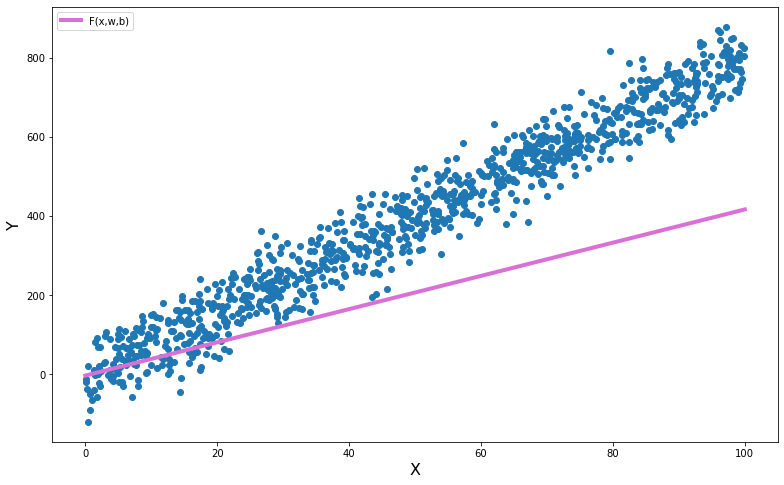

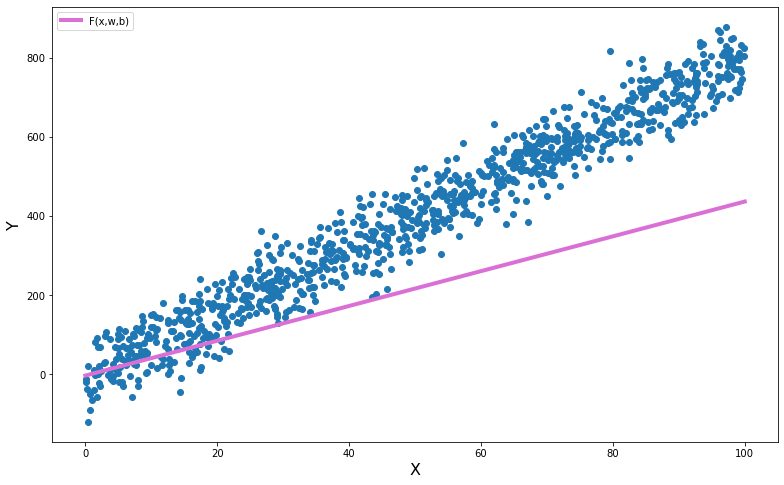

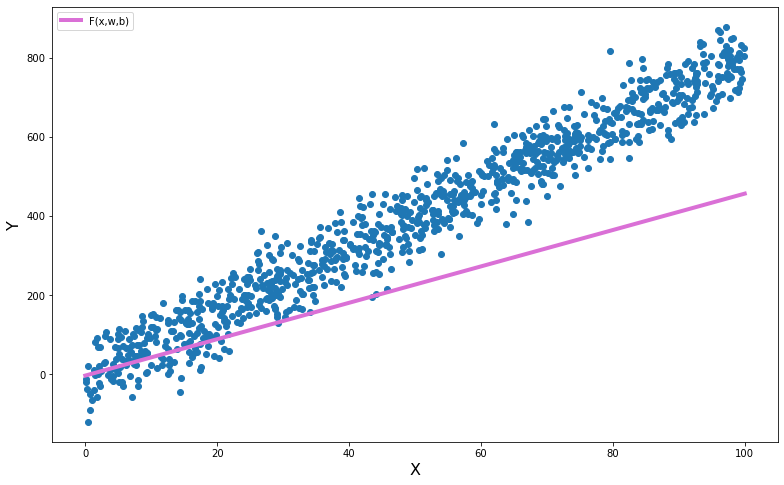

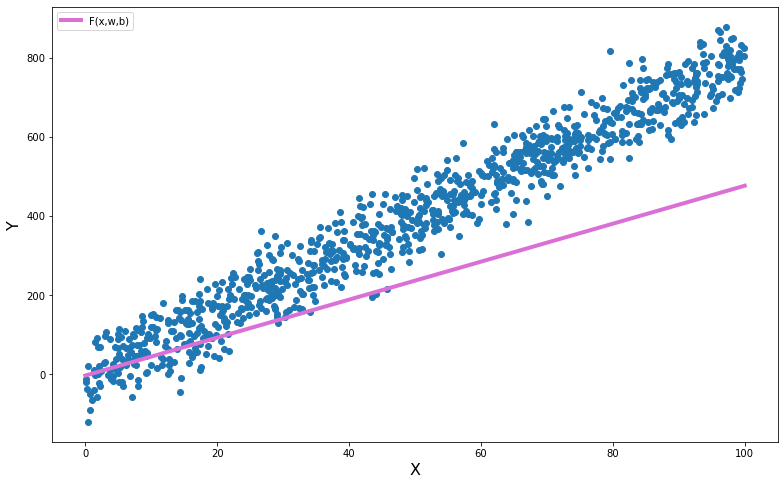

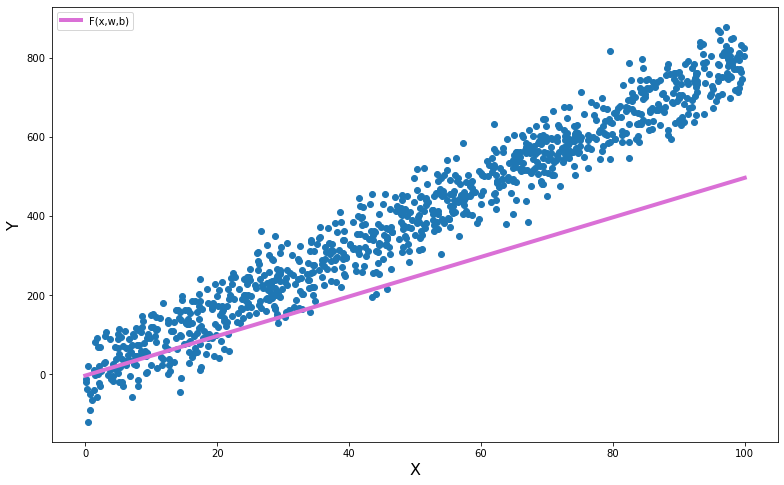

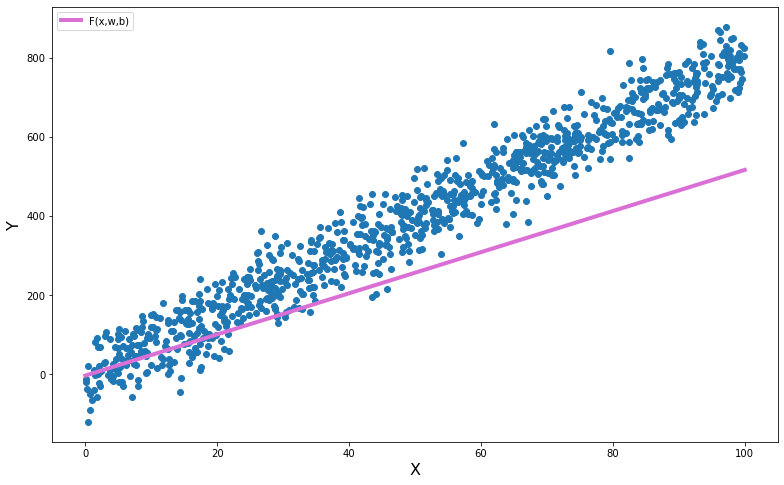

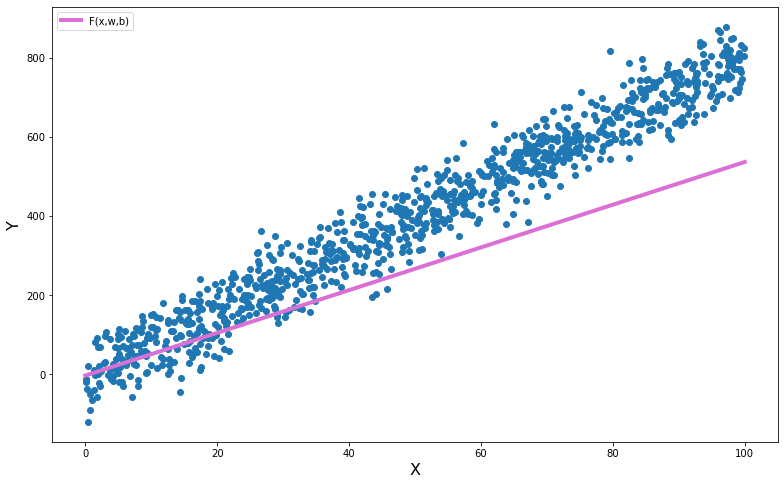

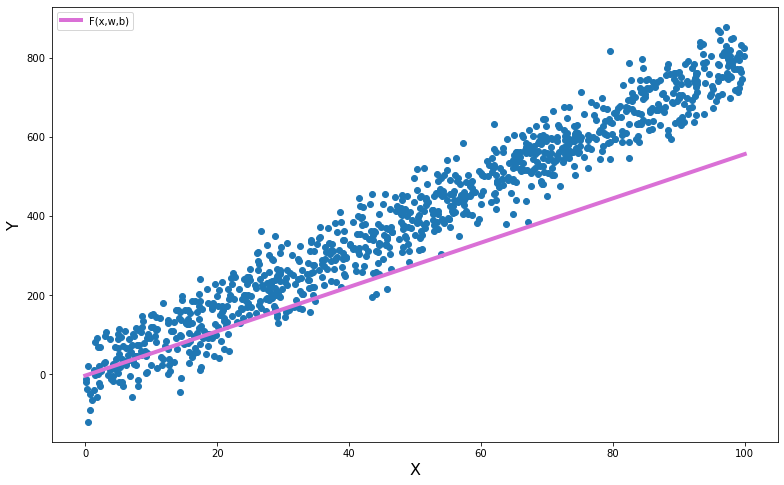

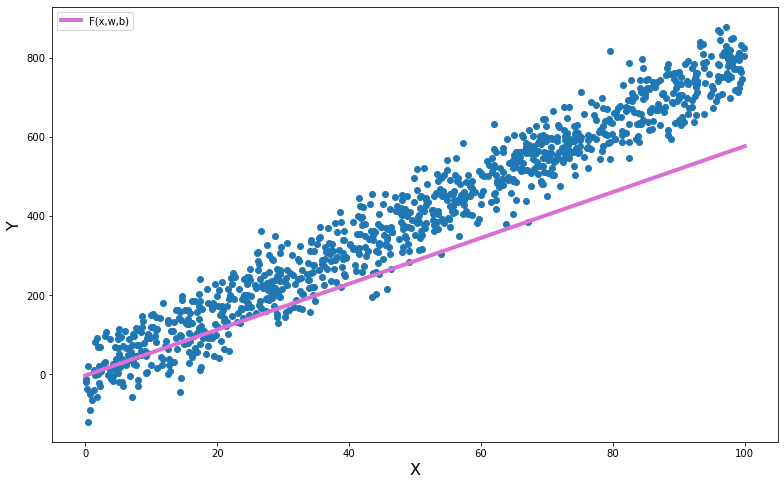

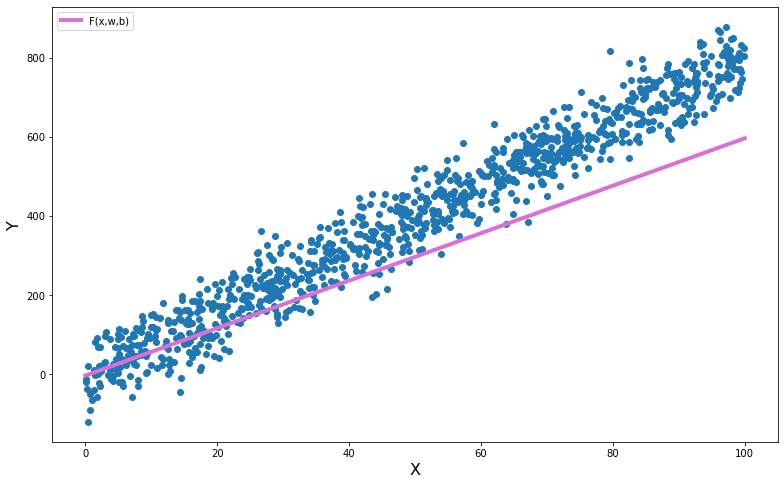

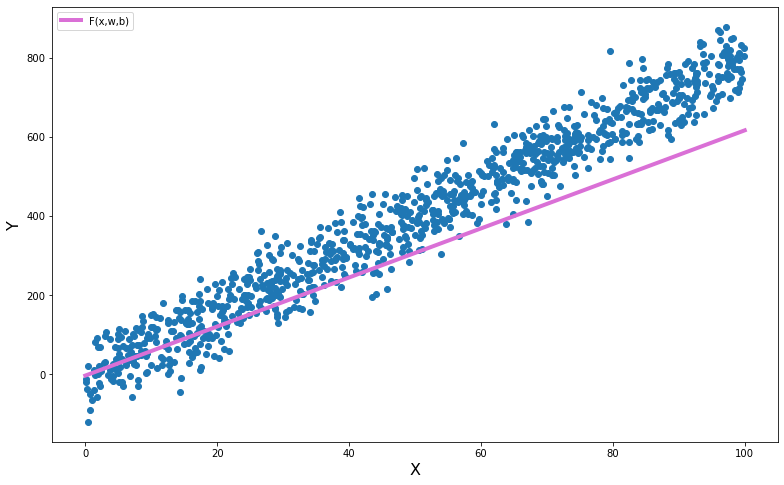

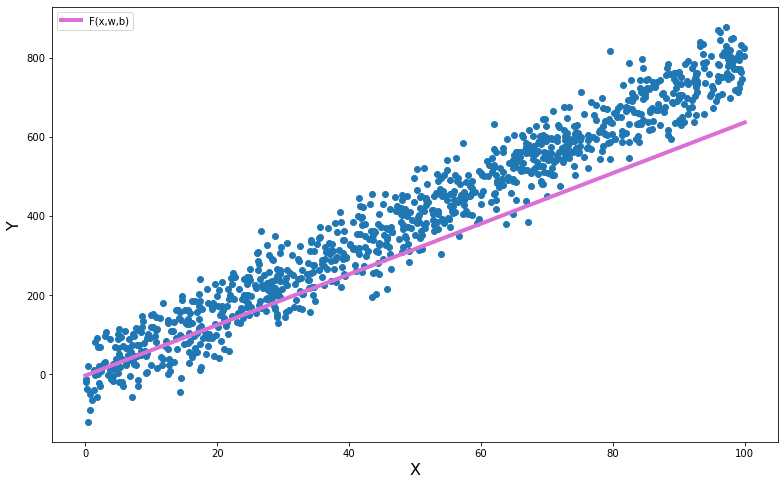

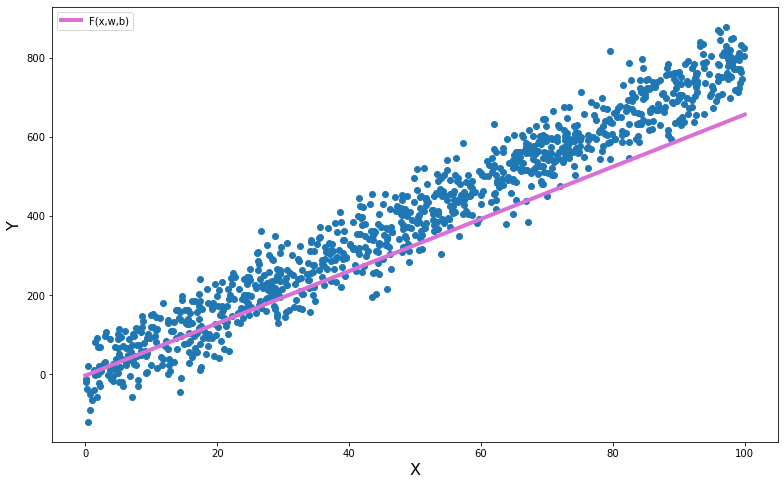

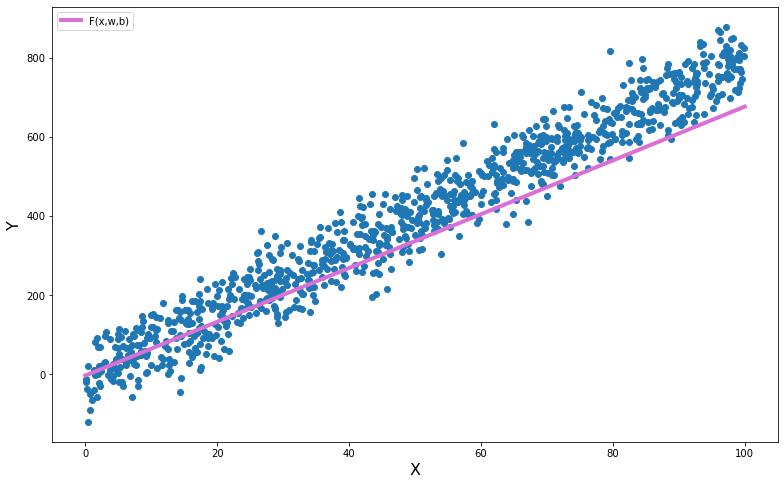

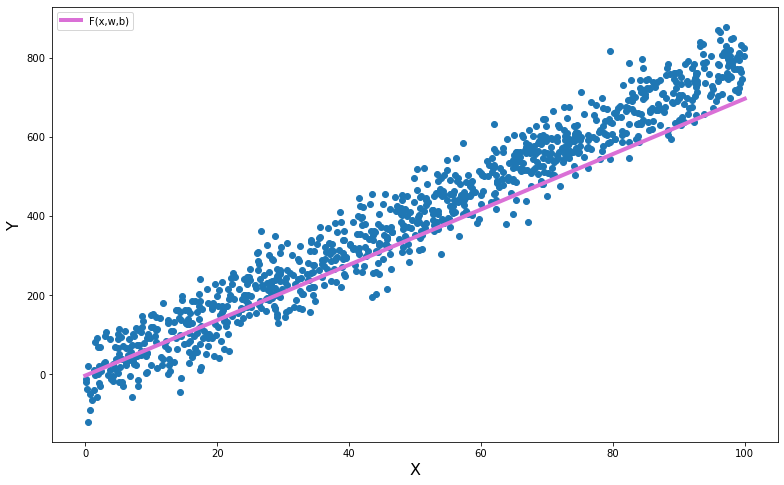

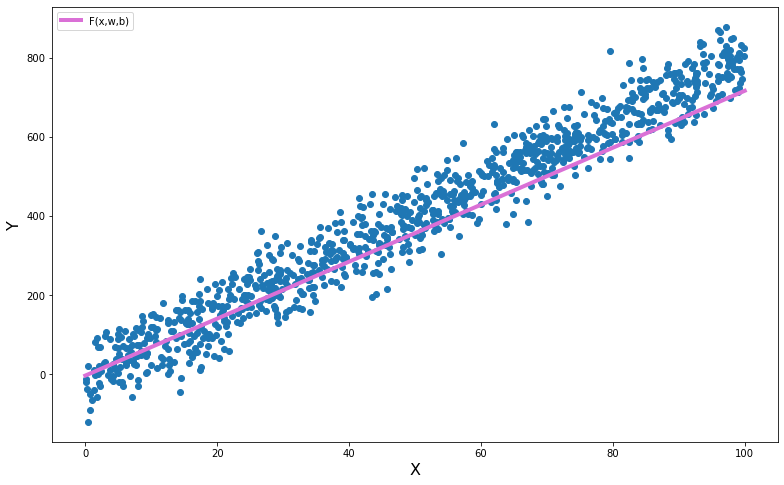

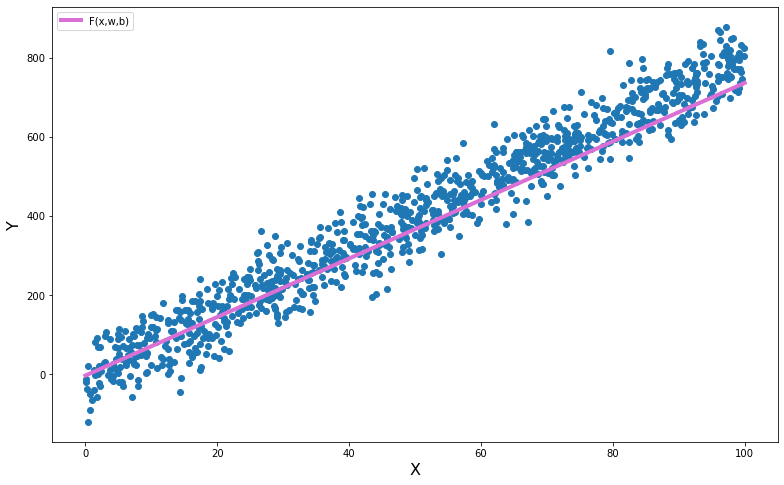

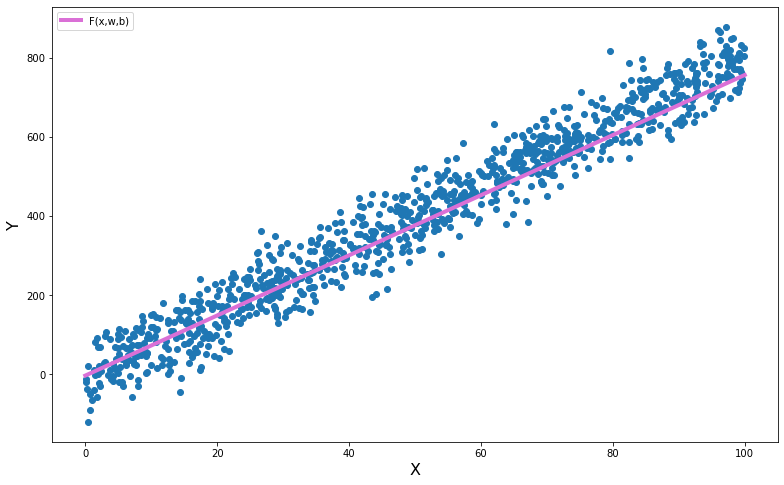

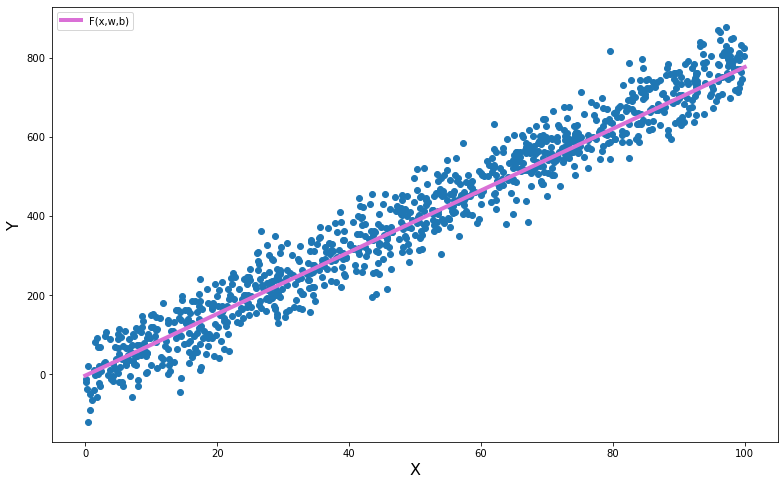

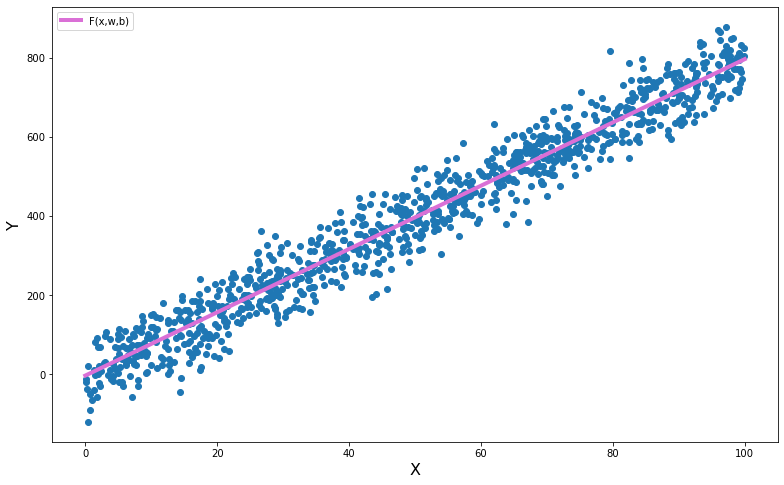

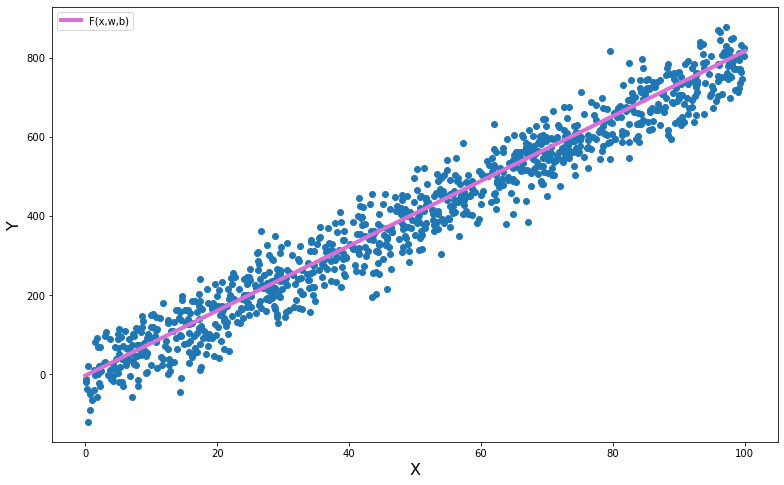

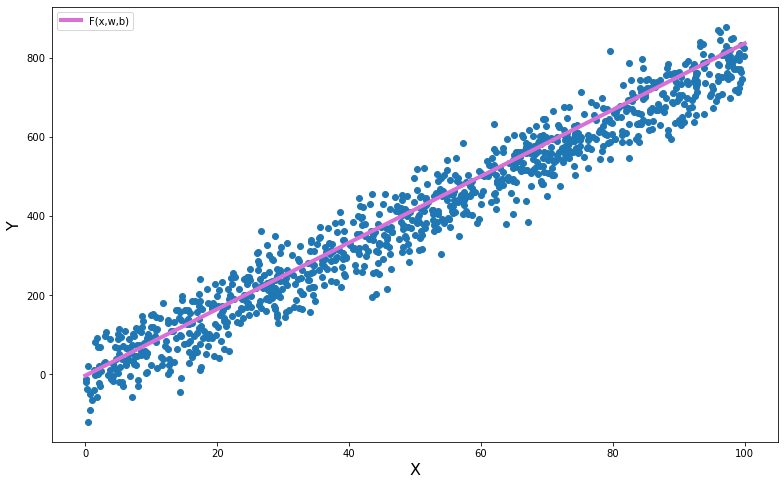

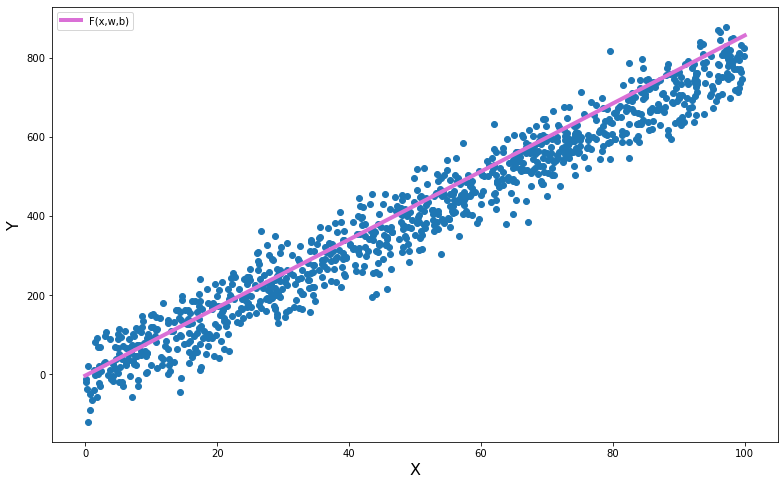

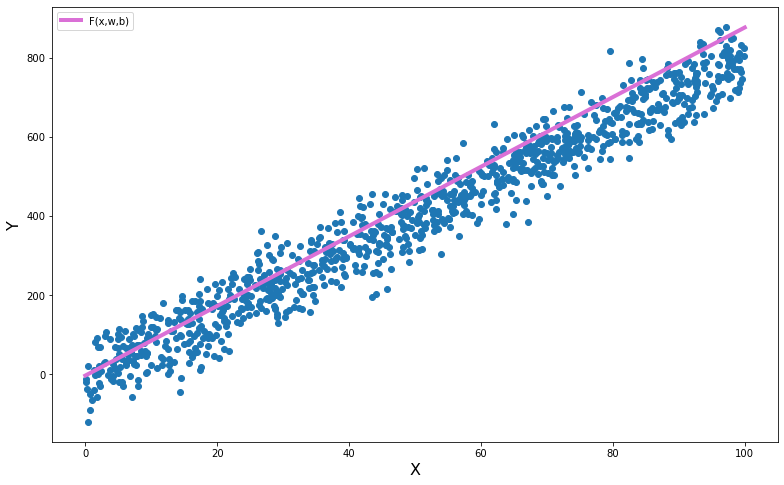

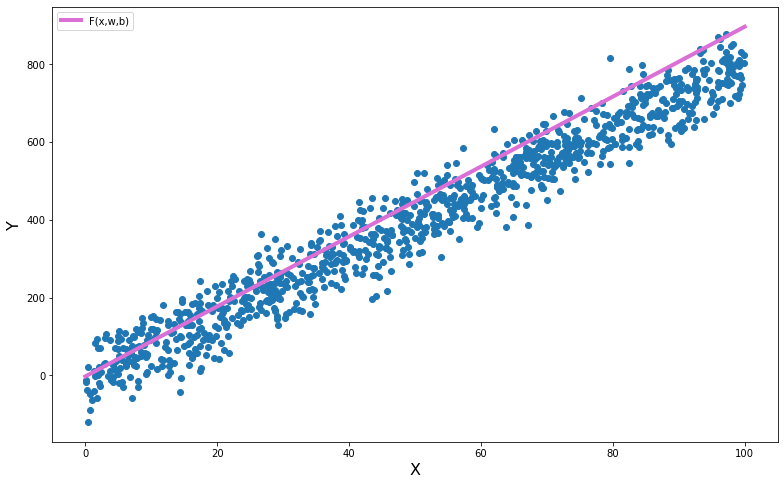

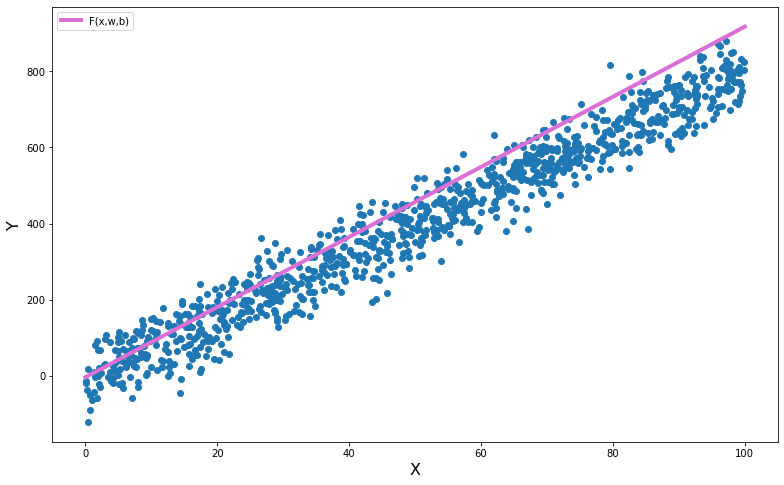

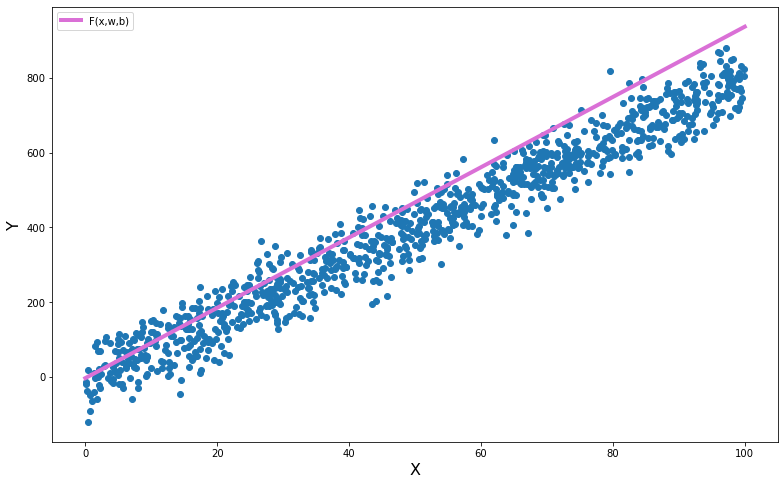

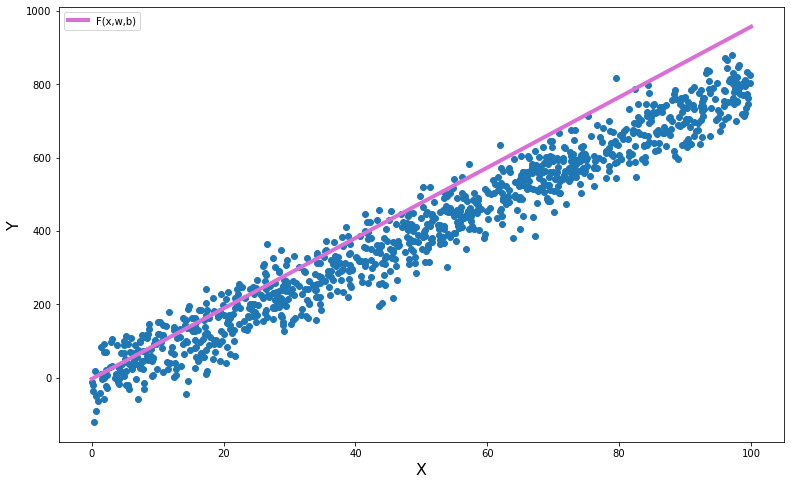

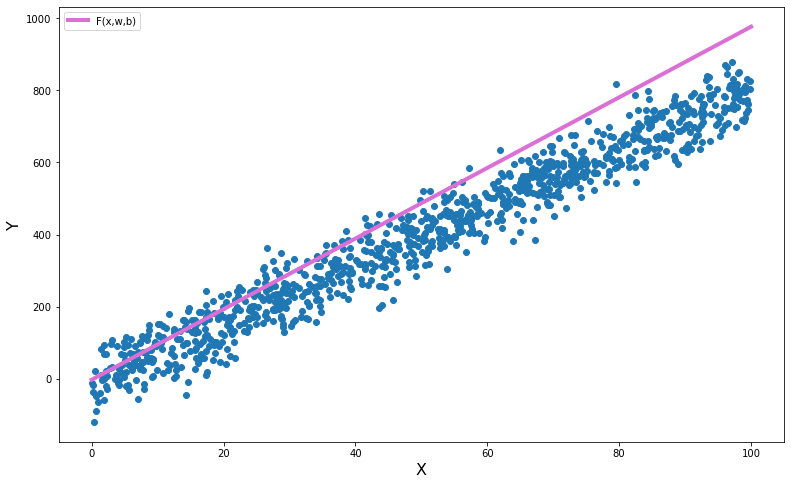

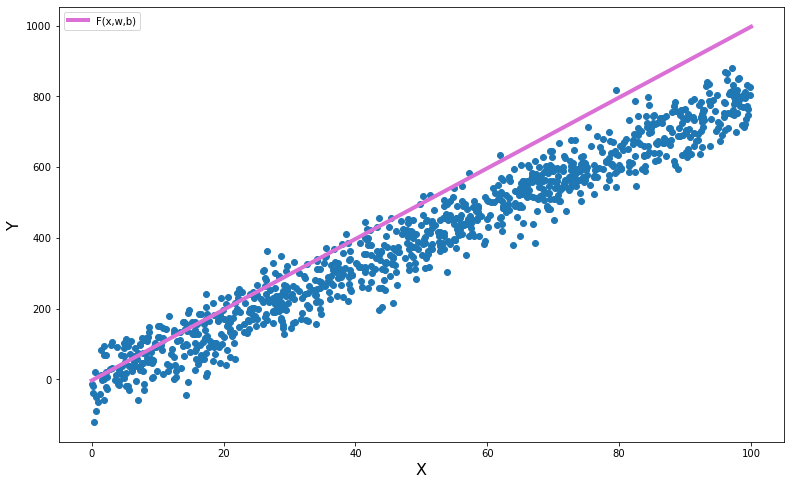

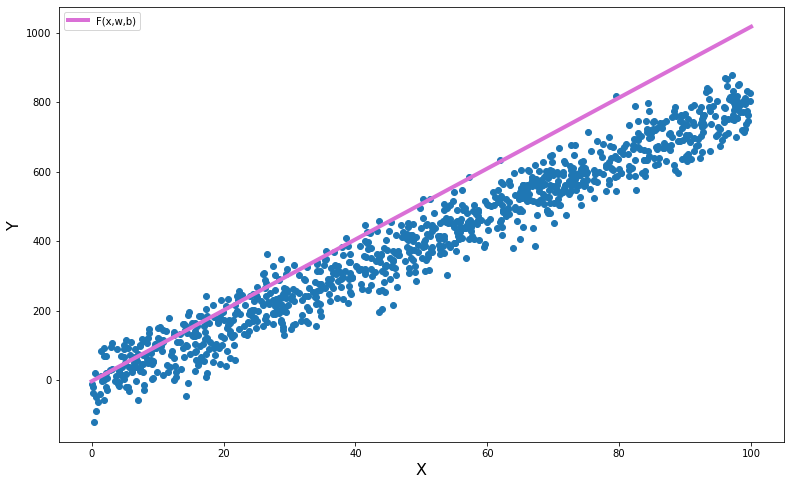

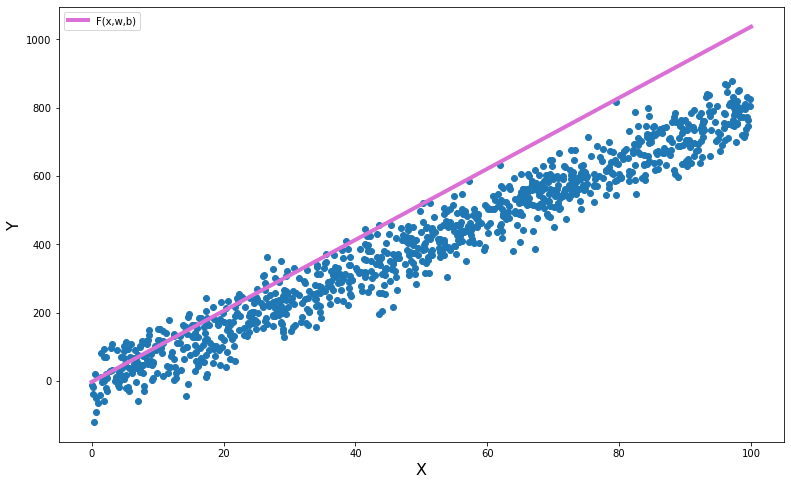

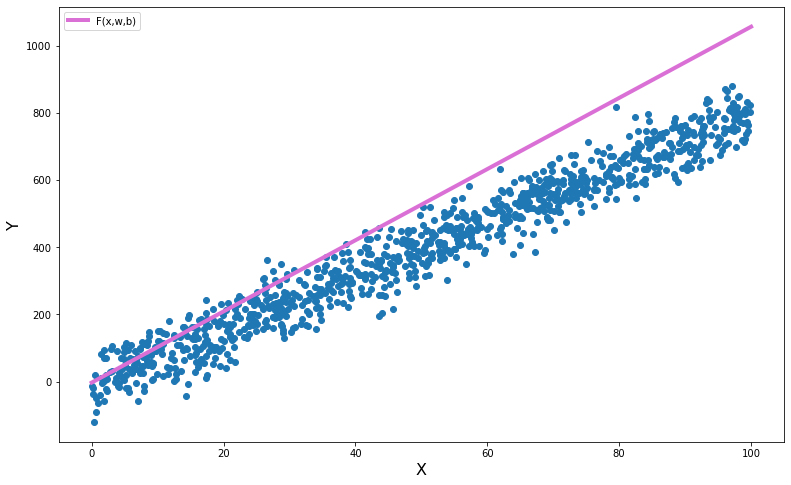

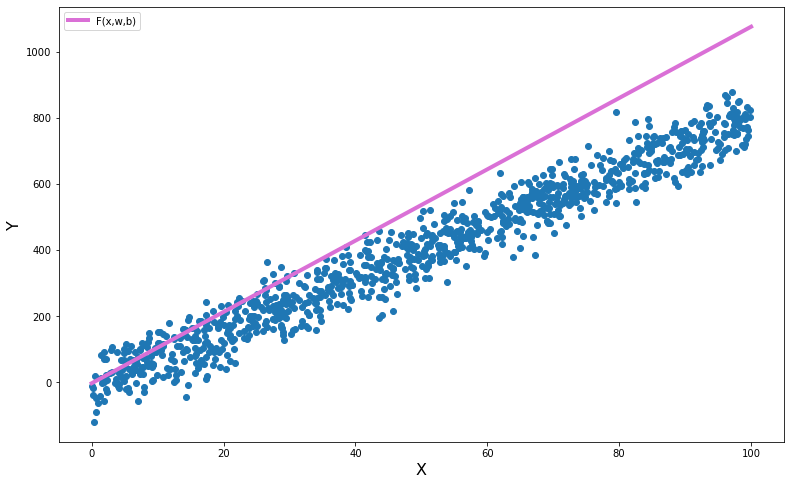

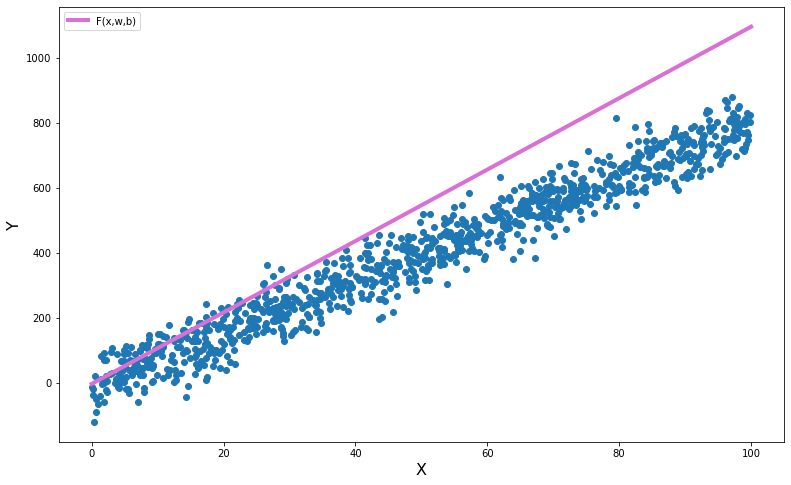

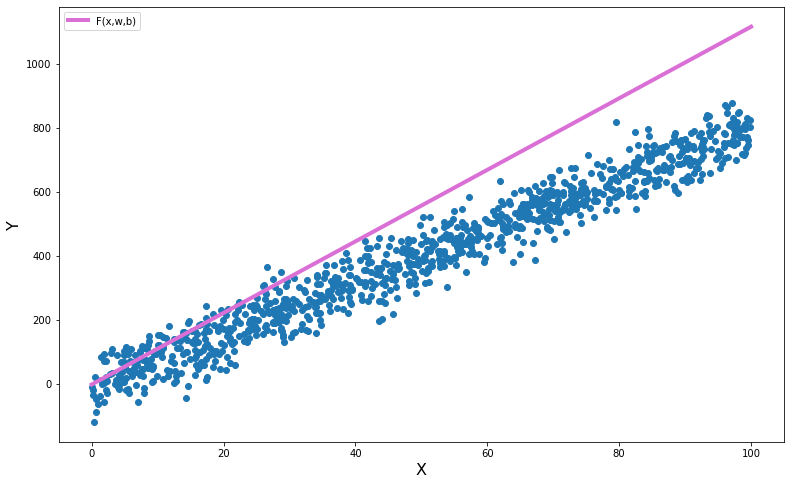

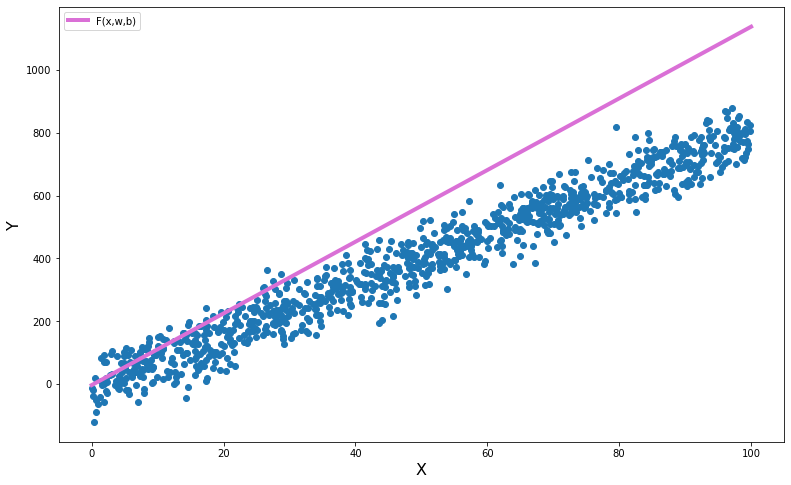

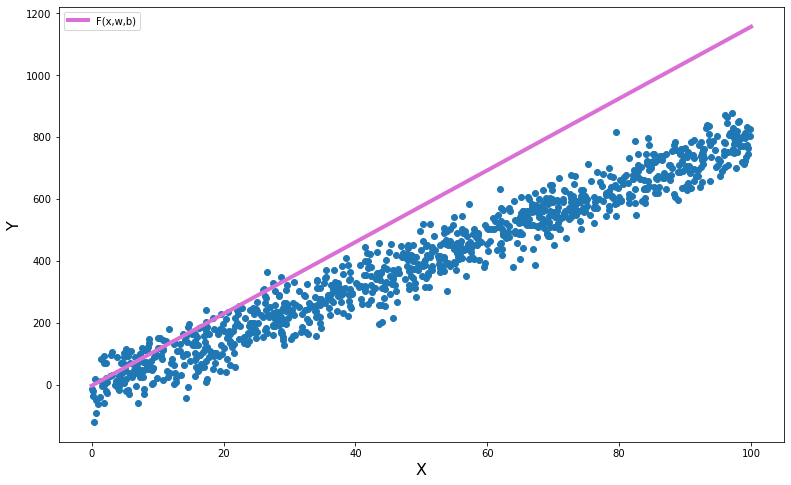

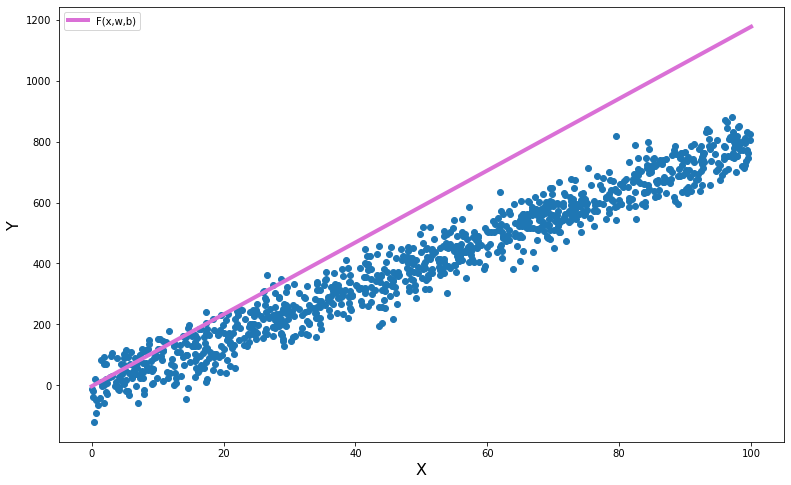

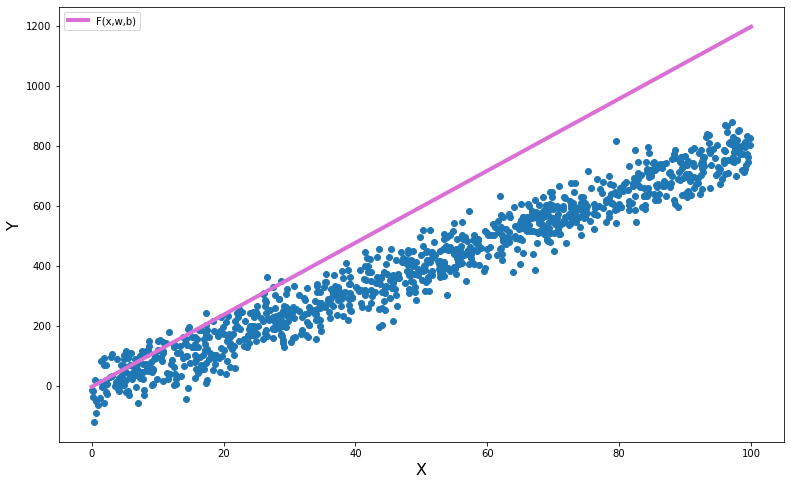

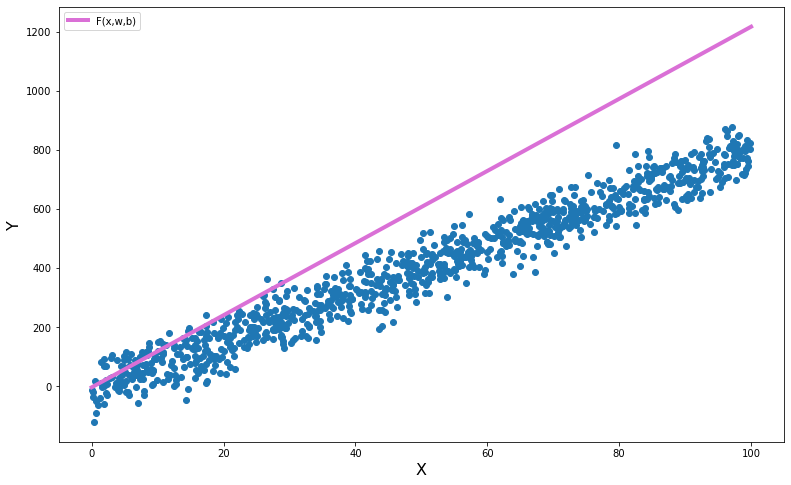

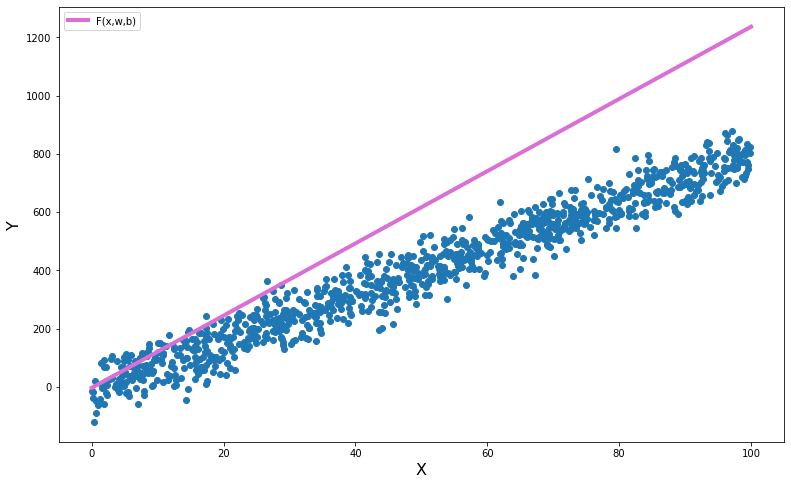

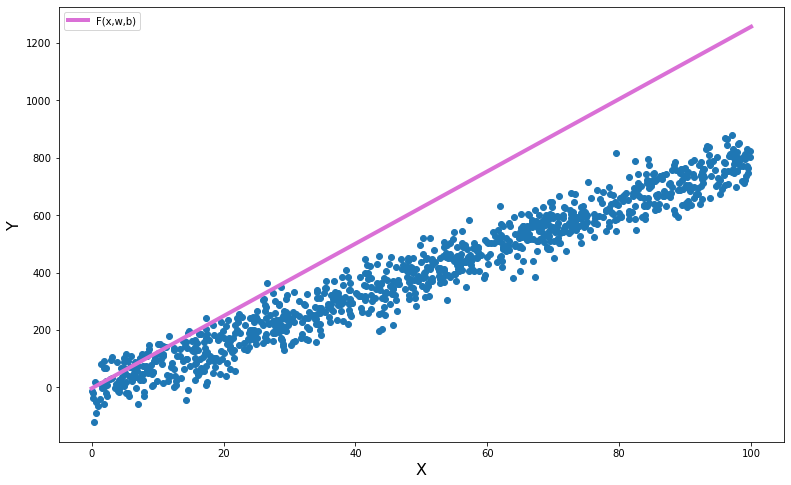

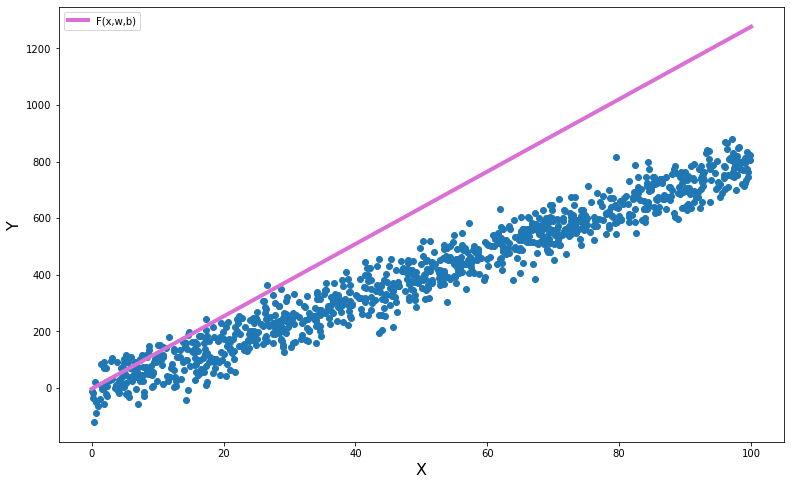

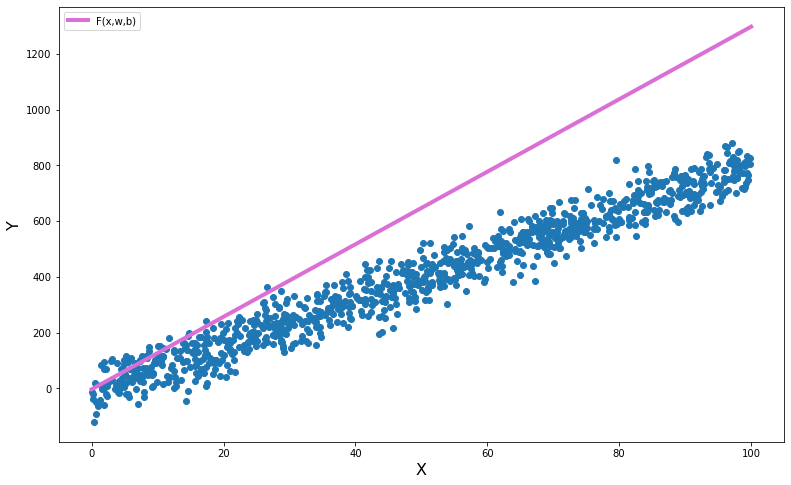

In [20]:
parameters = []

weight = weight_0
bias = -3.0

for i in range(50):
    
    weight, bias, residuo = update_weights_biases(weight, bias, 0.2, 0)
    parameters.append([weight, bias, residuo])
    print('weight: {0:10.2f} bias: {1:10.2f} residuo: {2:10.2f}'.format(weight,bias, residuo))

<font size=4>

Graficamos algunas de las funciones obtenidas:

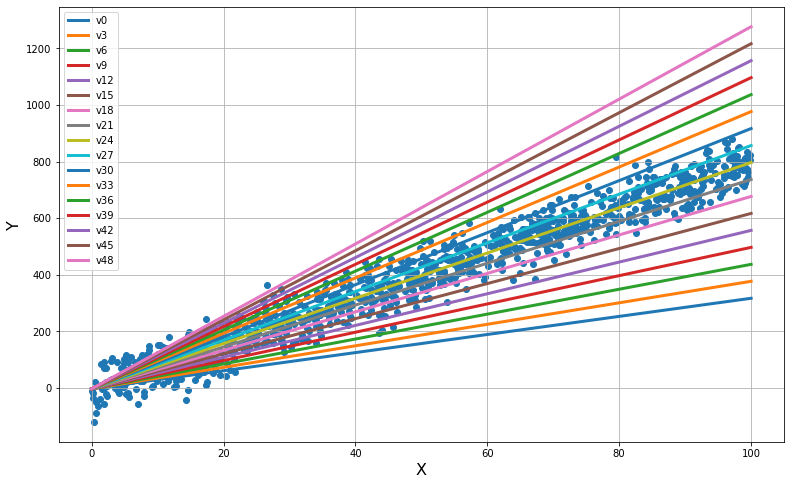

In [21]:
plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)

for i in range(0,50,3):
    plt.plot(x_, parameters[i][0]*x_ + parameters[i][1], label='v' + str(i), lw=3)
    plt.legend()

plt.scatter(x, y);

<font size=4>

A continuación se grafica el residuo en función de la pendiente, w.
 
 El valor óptimo de la pendiente es aquel que minimiza al residuo. 

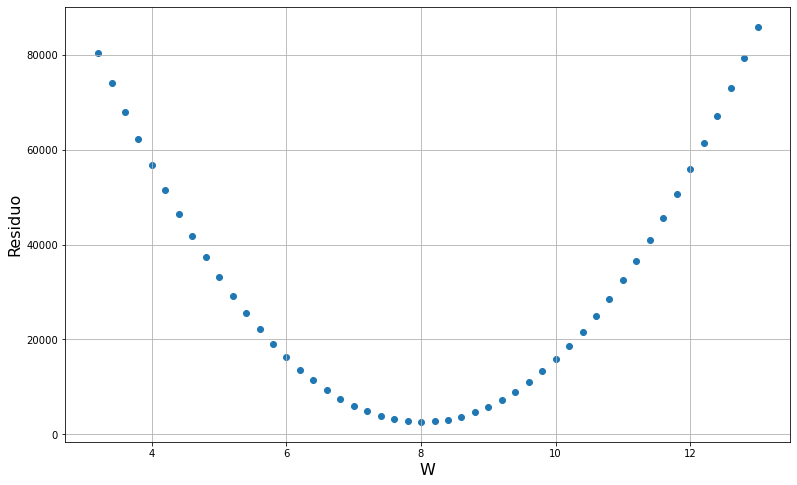

In [22]:
plt.figure(figsize=(13,8))
plt.ylabel('Residuo', fontsize=16)
plt.xlabel('W', fontsize=16)
plt.grid(True)

weights = []
residuos = []

for i in parameters: 
    weights.append(i[0])
    residuos.append(i[2])
    
plt.scatter(weights, residuos);

<font size = 4>

Como se observa en la grafica anterior, el mínimo de la pendiente esta cerca de 8, en $ w \approx 8$.

In [23]:
index_min = np.argmin(residuos)
print('El residuo mas pequeño tiene el valor: {0:10.2f}'.format(parameters[index_min][2]))

print('Los valores optimos de los parámetros son w = {0:5.2f} y b = {1:5.2f} ' \
      .format(parameters[index_min][0], parameters[index_min][1]))

El residuo mas pequeño tiene el valor:    2586.02
Los valores optimos de los parámetros son w =  8.00 y b = -3.00 


<font size = 4>

Se grafica la recta con los valores óptimos encontrados $ \hat w $ y $\hat b $:

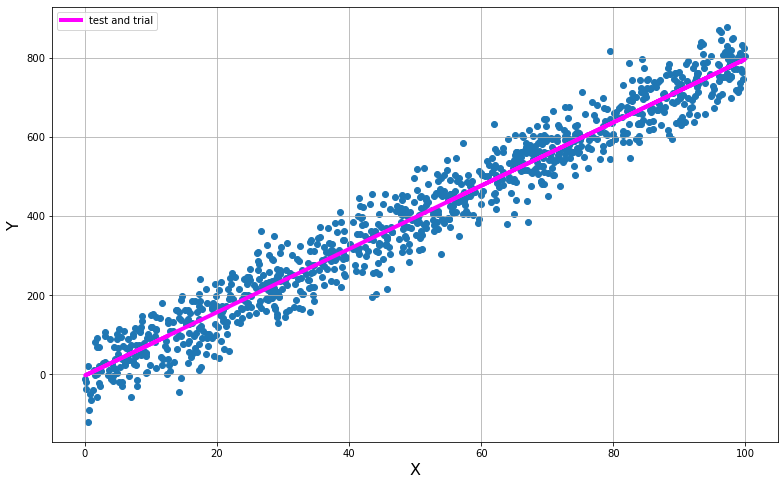

In [24]:
plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)

plt.plot(x, parameters[np.argmin(residuos)][0]*x+parameters[np.argmin(residuos)][1], color='magenta', label='test and trial', lw=4)
plt.legend()

plt.scatter(x, y);

> ### Ahora se va a realizar un proceso similiar al anterior pero ahora se va a dejar fijo w y se va a variar a b.

residuo:   58745.57
weight:       8.00 bias:    -240.00 residuo:   58745.57
residuo:   54105.97
weight:       8.00 bias:    -230.00 residuo:   54105.97
residuo:   49666.37
weight:       8.00 bias:    -220.00 residuo:   49666.37
residuo:   45426.77
weight:       8.00 bias:    -210.00 residuo:   45426.77
residuo:   41387.16
weight:       8.00 bias:    -200.00 residuo:   41387.16
residuo:   37547.56
weight:       8.00 bias:    -190.00 residuo:   37547.56
residuo:   33907.96
weight:       8.00 bias:    -180.00 residuo:   33907.96
residuo:   30468.36
weight:       8.00 bias:    -170.00 residuo:   30468.36
residuo:   27228.76
weight:       8.00 bias:    -160.00 residuo:   27228.76
residuo:   24189.16
weight:       8.00 bias:    -150.00 residuo:   24189.16
residuo:   21349.56
weight:       8.00 bias:    -140.00 residuo:   21349.56
residuo:   18709.96
weight:       8.00 bias:    -130.00 residuo:   18709.96
residuo:   16270.35
weight:       8.00 bias:    -120.00 residuo:   16270.35
residuo:   1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    3953.54
weight:       8.00 bias:     -40.00 residuo:    3953.54
residuo:    3313.94

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



weight:       8.00 bias:     -30.00 residuo:    3313.94
residuo:    2874.34

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



weight:       8.00 bias:     -20.00 residuo:    2874.34
residuo:    2634.74
weight:       8.00 bias:     -10.00 residuo:    2634.74


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    2595.14
weight:       8.00 bias:       0.00 residuo:    2595.14


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    2755.54
weight:       8.00 bias:      10.00 residuo:    2755.54
residuo:    3115.94

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



weight:       8.00 bias:      20.00 residuo:    3115.94


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    3676.33
weight:       8.00 bias:      30.00 residuo:    3676.33


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    4436.73
weight:       8.00 bias:      40.00 residuo:    4436.73
residuo:    5397.13
weight:       8.00 bias:      50.00 residuo:    5397.13


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    6557.53
weight:       8.00 bias:      60.00 residuo:    6557.53
residuo:    7917.93
weight:       8.00 bias:      70.00 residuo:    7917.93


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:    9478.33
weight:       8.00 bias:      80.00 residuo:    9478.33
residuo:   11238.73
weight:       8.00 bias:      90.00 residuo:   11238.73


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   13199.13
weight:       8.00 bias:     100.00 residuo:   13199.13


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   15359.52
weight:       8.00 bias:     110.00 residuo:   15359.52
residuo:   17719.92
weight:       8.00 bias:     120.00 residuo:   17719.92


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   20280.32
weight:       8.00 bias:     130.00 residuo:   20280.32
residuo:   23040.72
weight:       8.00 bias:     140.00 residuo:   23040.72


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   26001.12
weight:       8.00 bias:     150.00 residuo:   26001.12


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   29161.52
weight:       8.00 bias:     160.00 residuo:   29161.52
residuo:   32521.92
weight:       8.00 bias:     170.00 residuo:   32521.92


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   36082.31
weight:       8.00 bias:     180.00 residuo:   36082.31
residuo:   39842.71
weight:       8.00 bias:     190.00 residuo:   39842.71


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   43803.11
weight:       8.00 bias:     200.00 residuo:   43803.11
residuo:   47963.51
weight:       8.00 bias:     210.00 residuo:   47963.51


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   52323.91
weight:       8.00 bias:     220.00 residuo:   52323.91
residuo:   56884.31
weight:       8.00 bias:     230.00 residuo:   56884.31


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


residuo:   61644.71
weight:       8.00 bias:     240.00 residuo:   61644.71
residuo:   66605.11
weight:       8.00 bias:     250.00 residuo:   66605.11


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


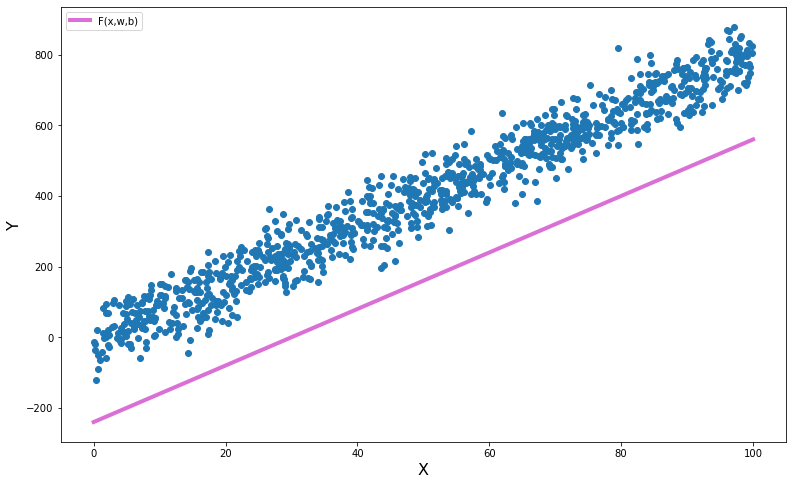

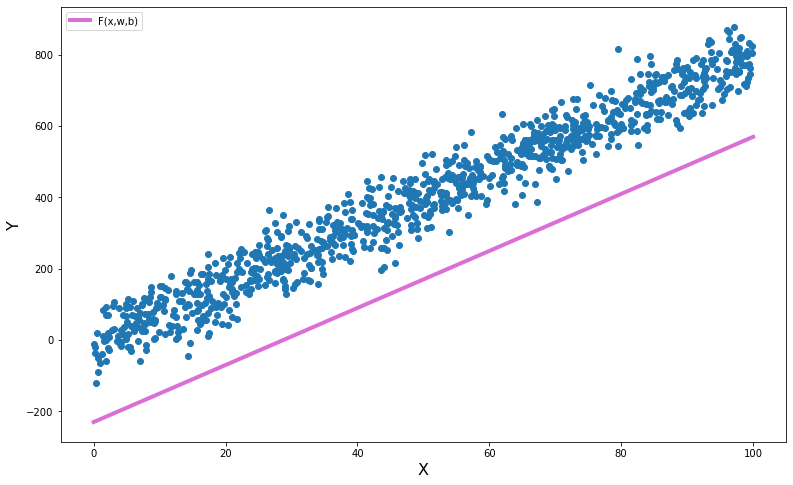

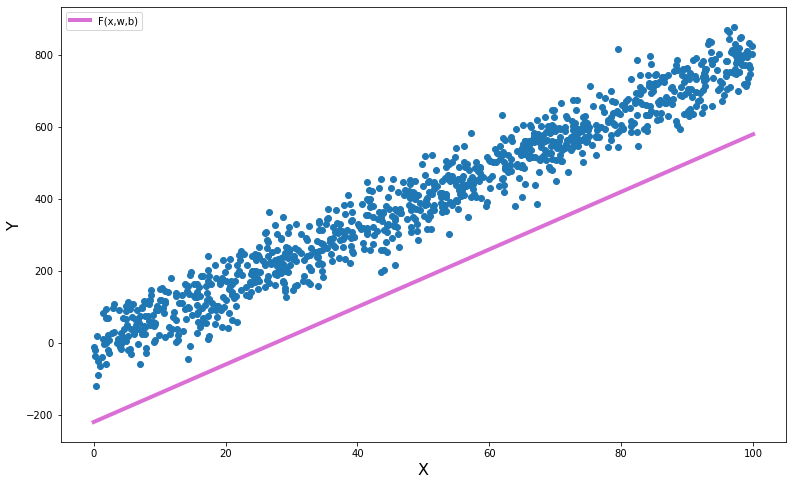

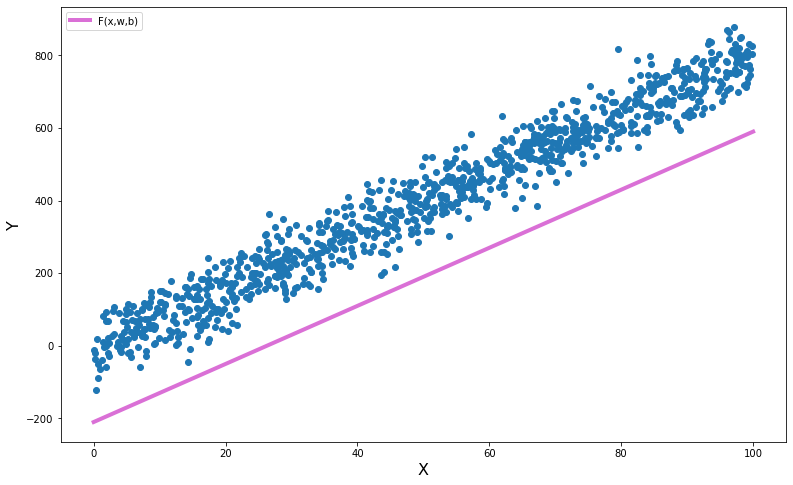

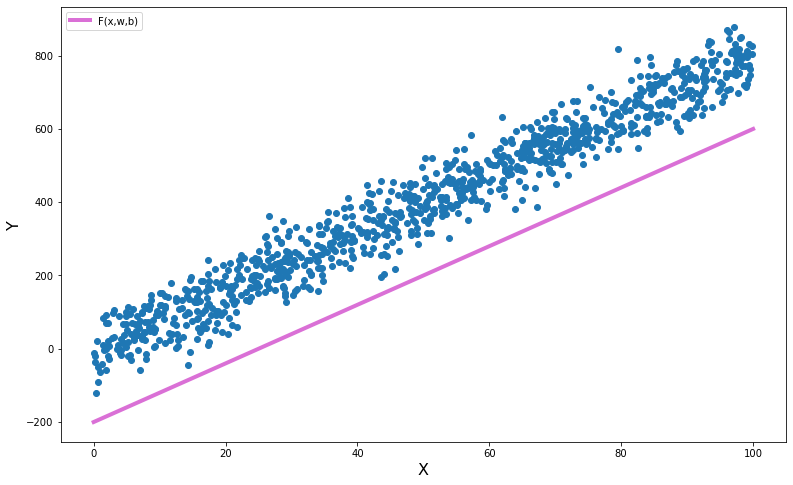

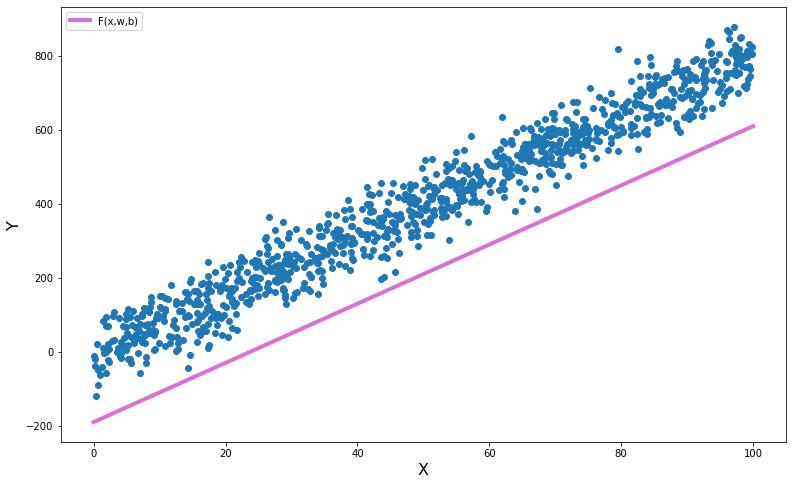

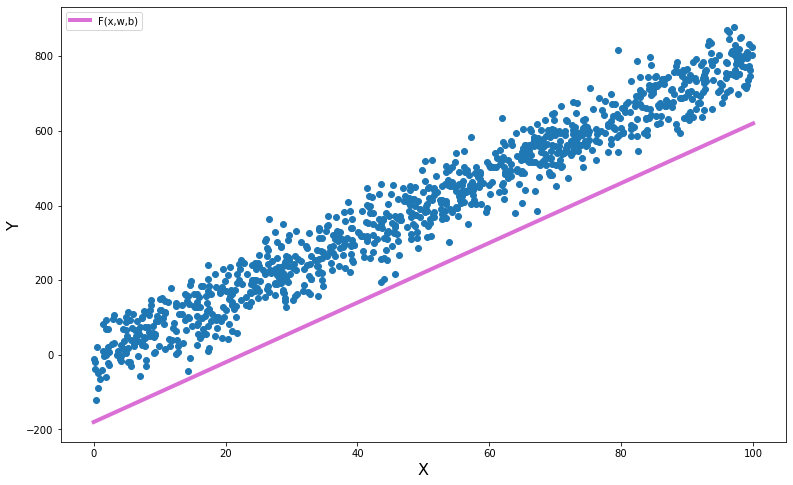

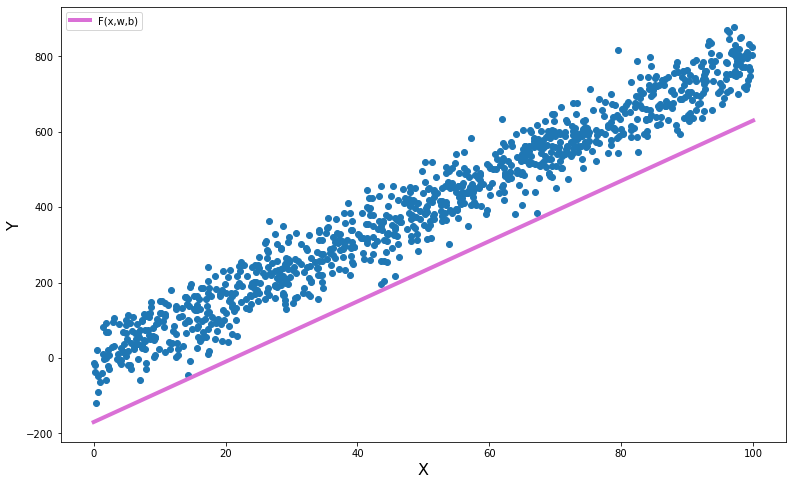

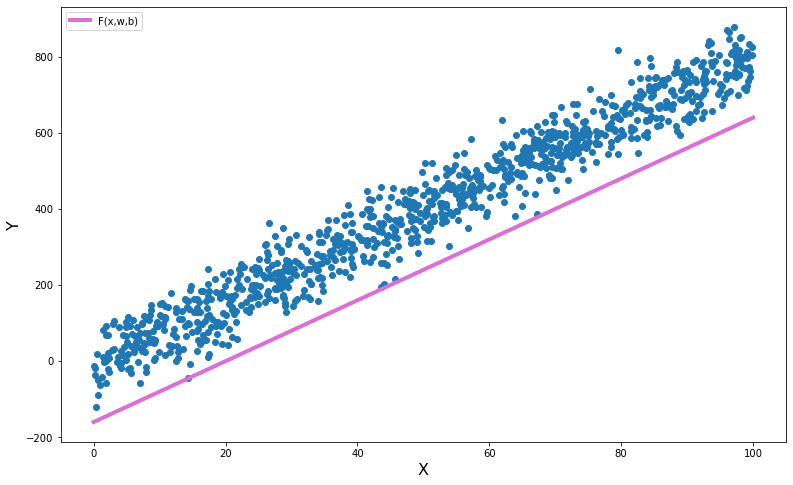

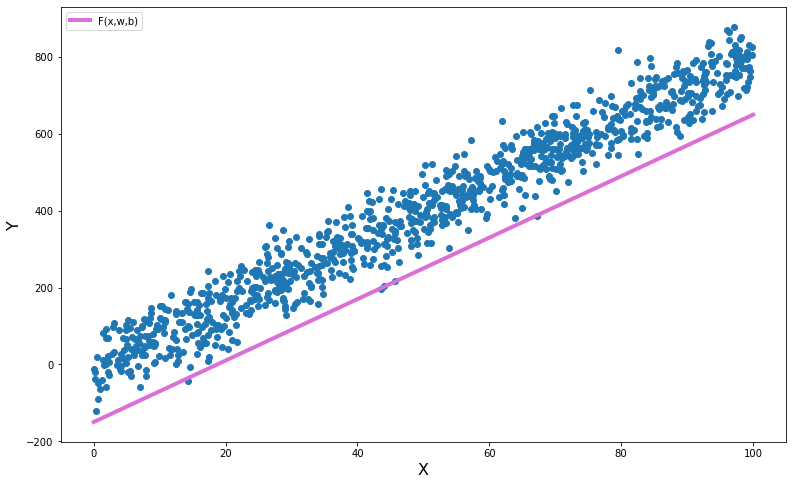

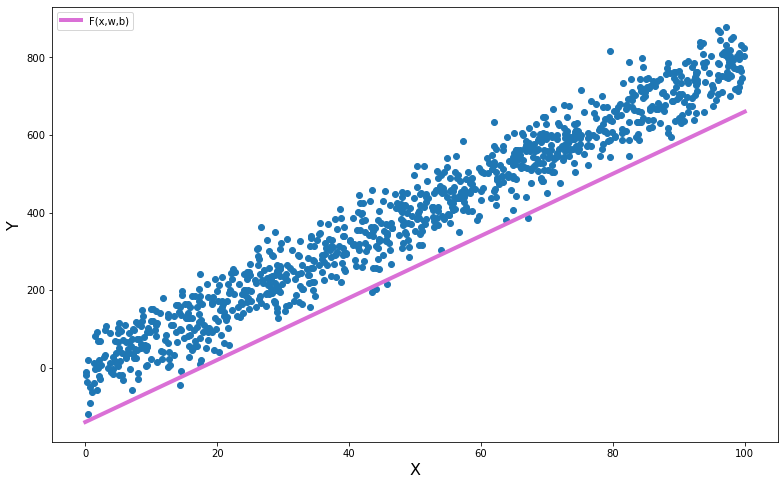

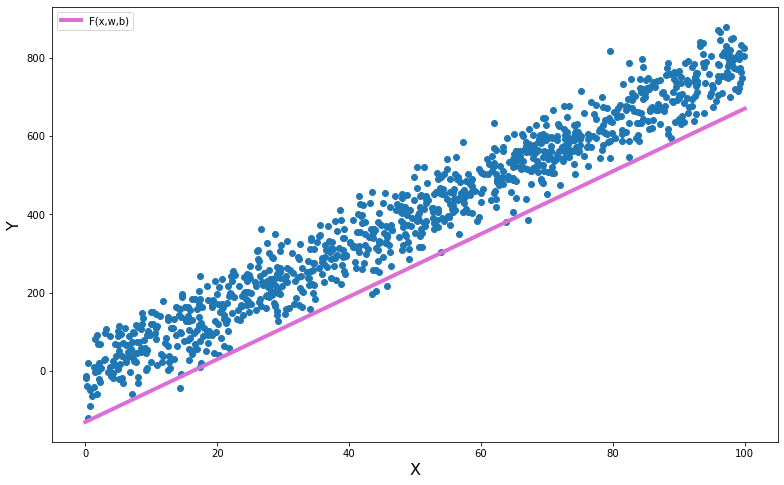

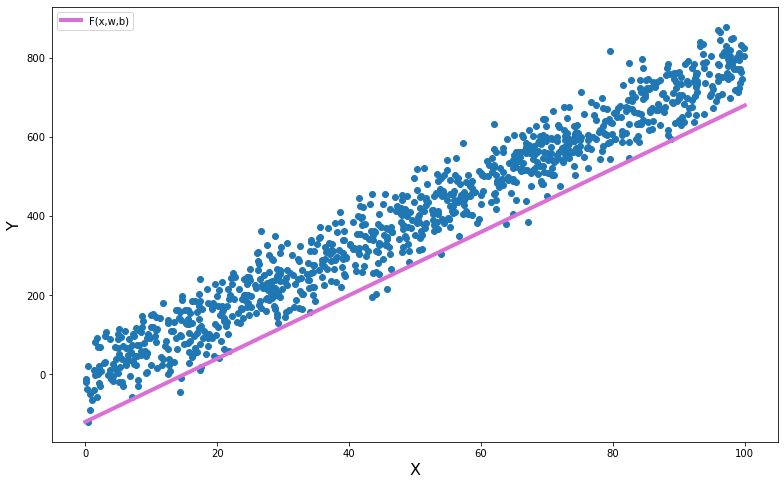

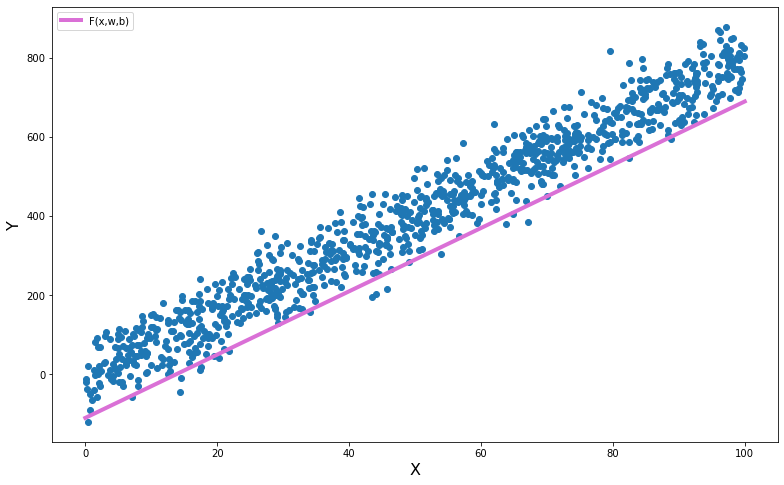

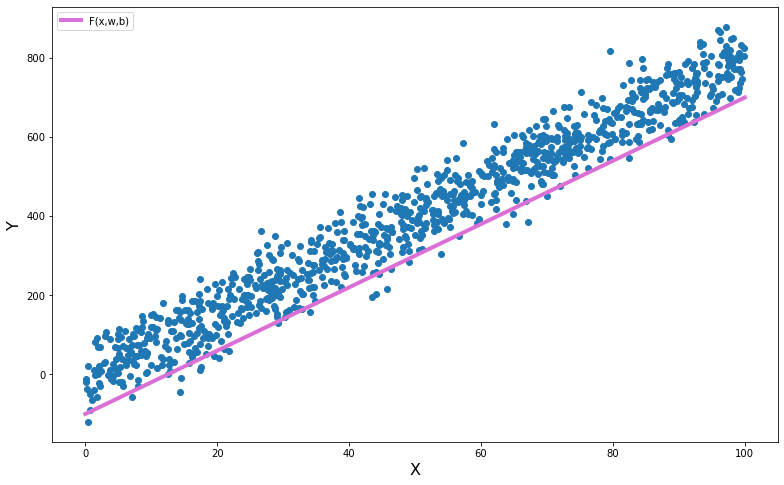

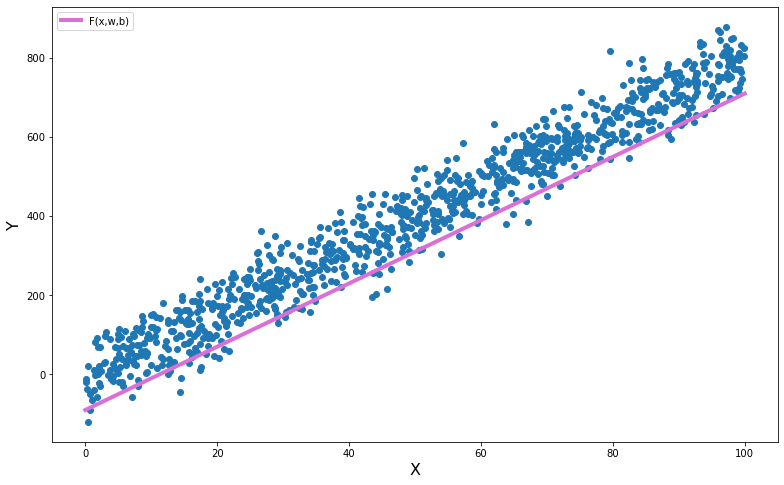

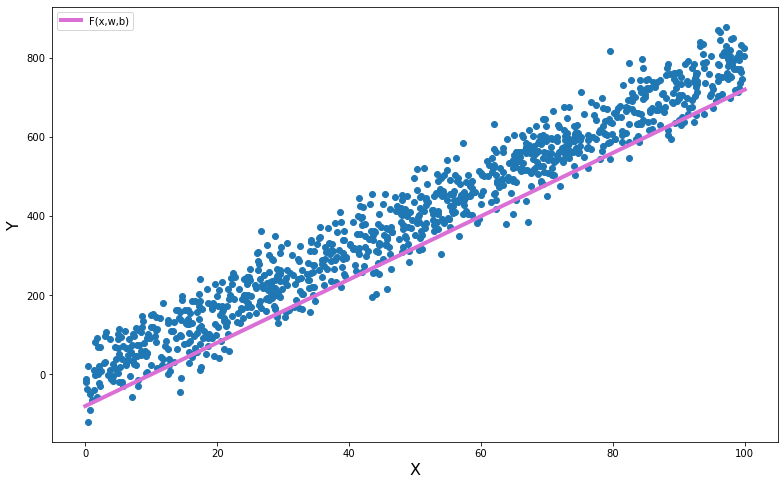

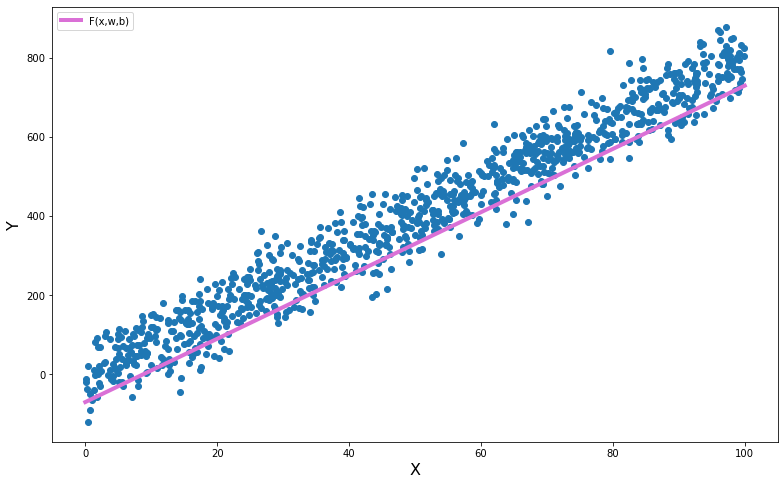

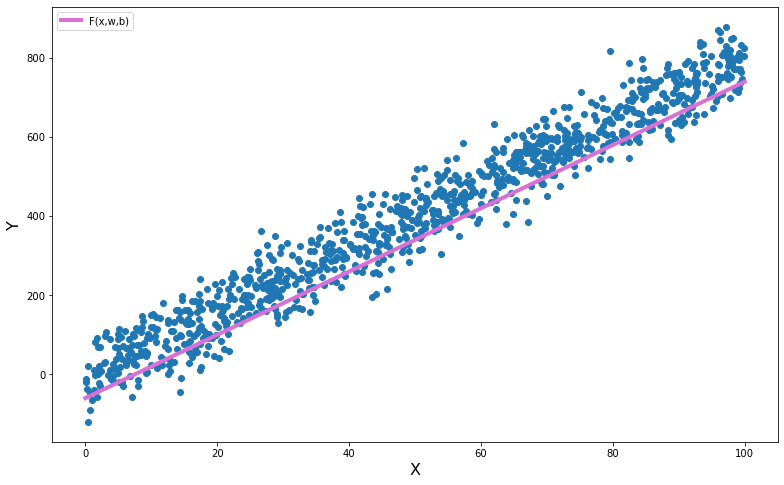

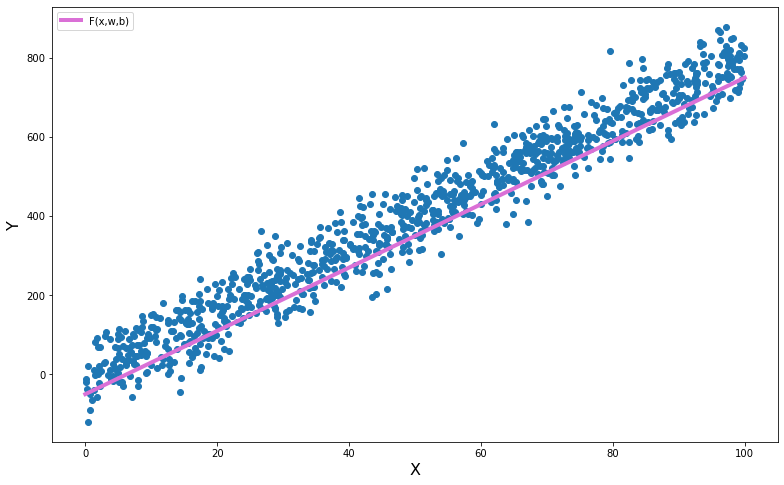

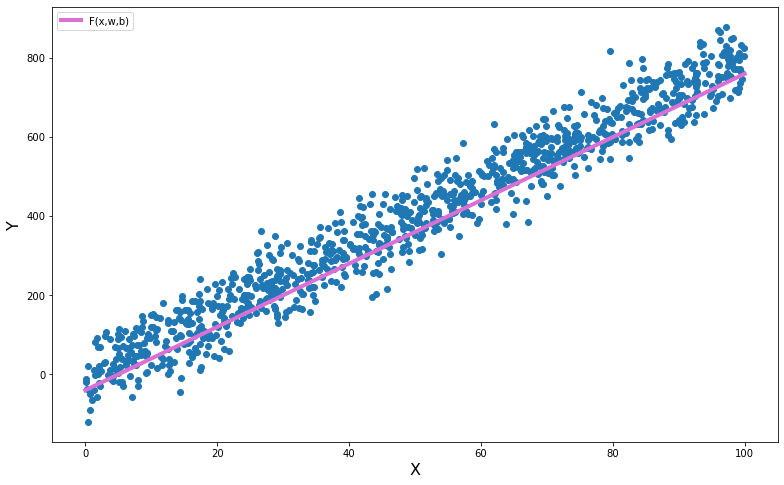

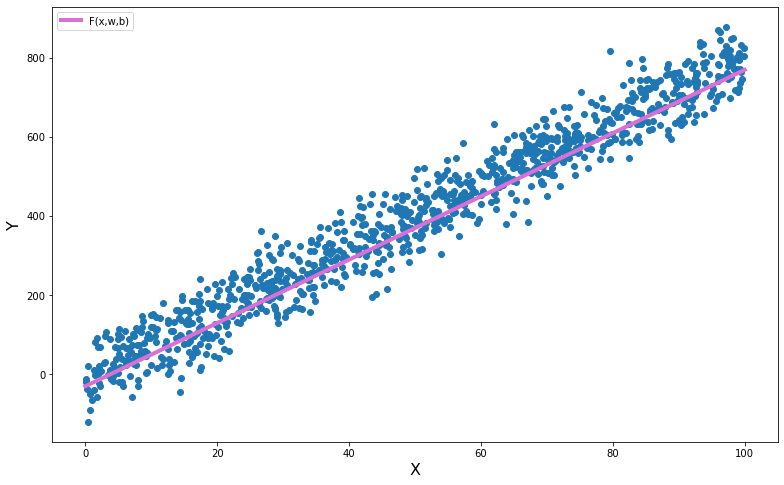

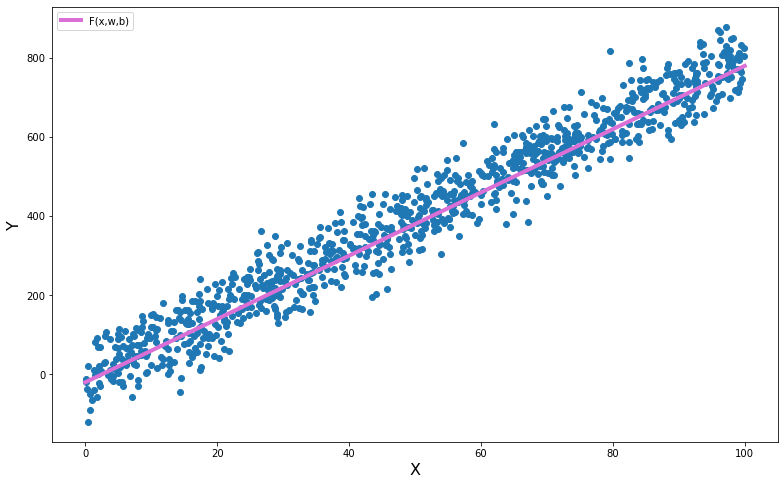

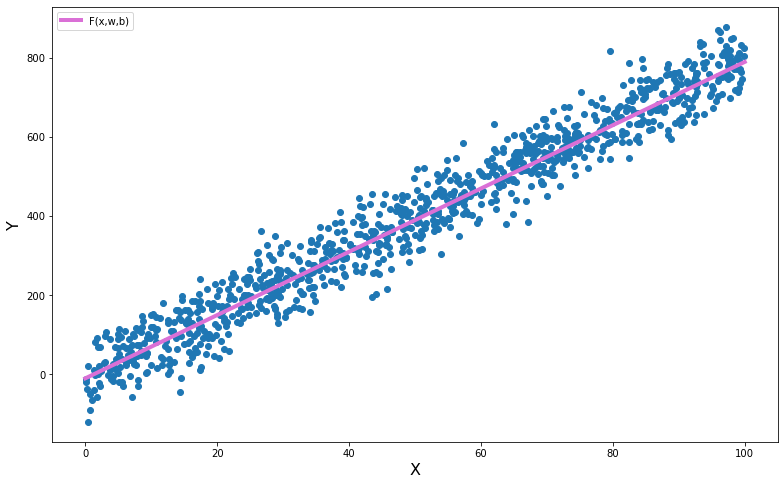

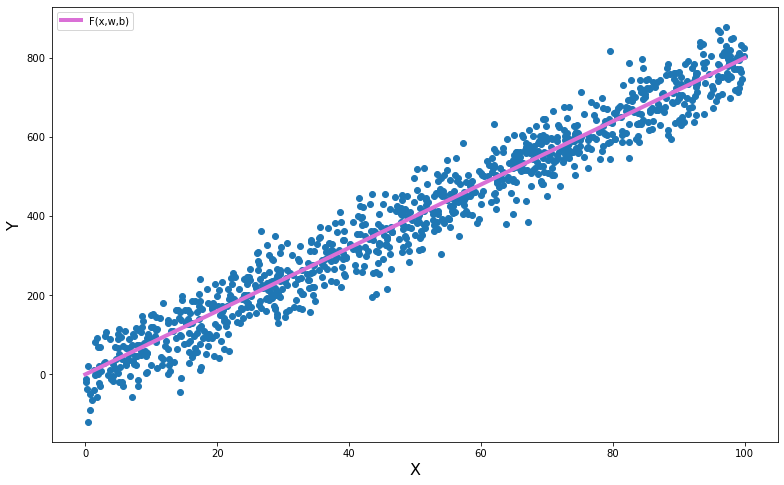

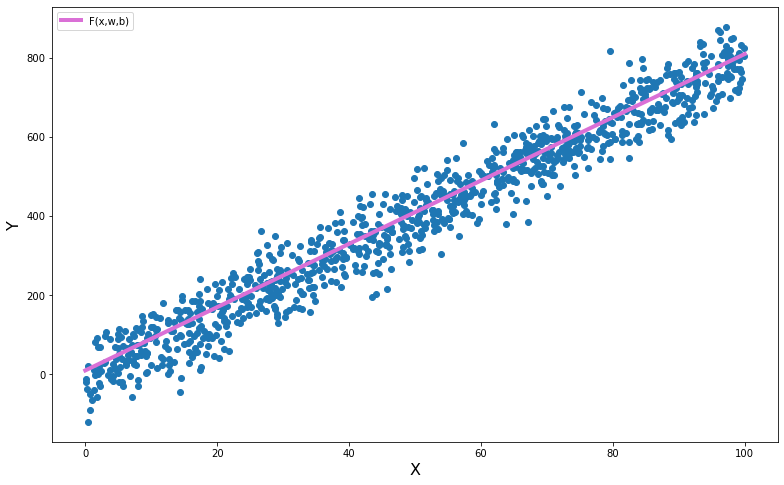

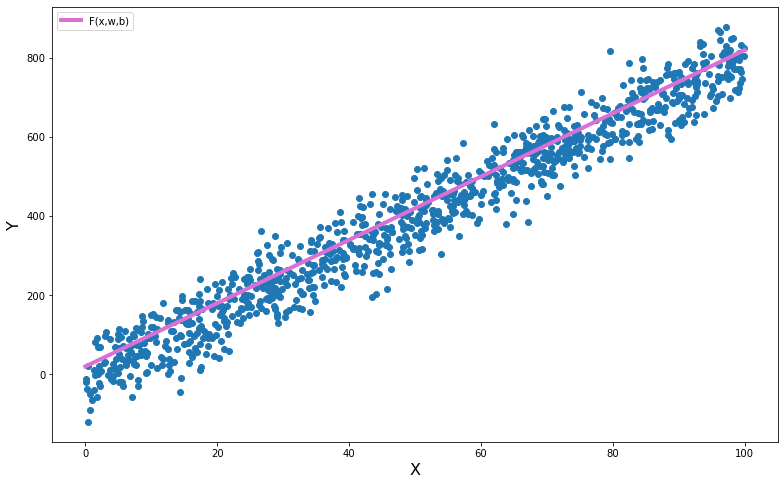

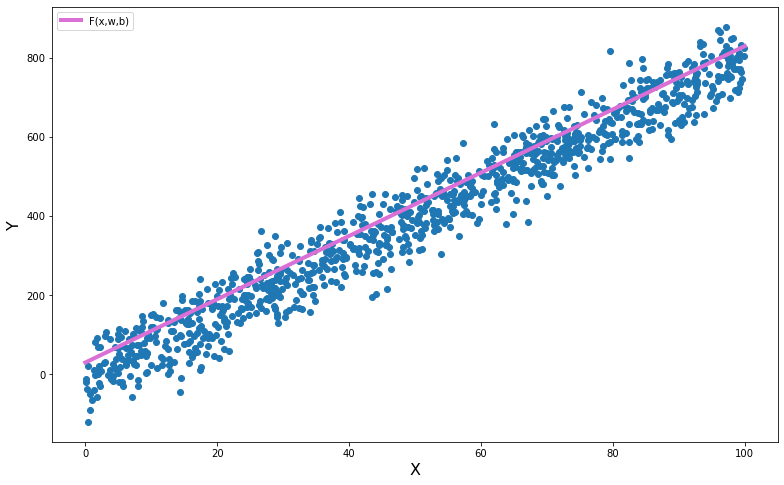

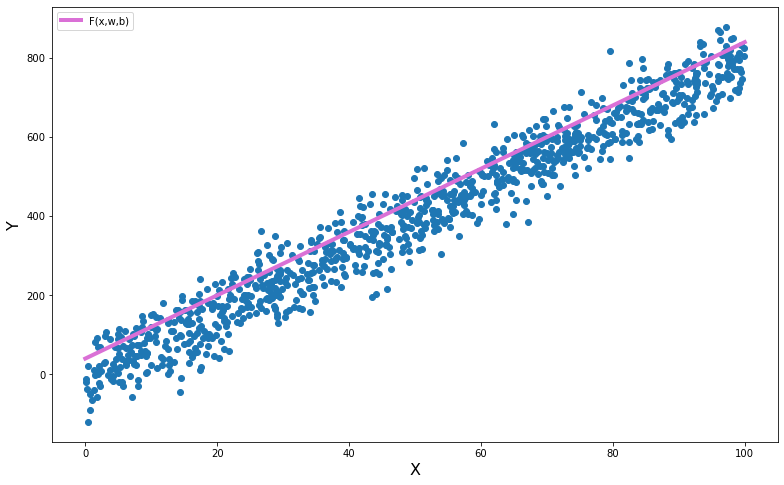

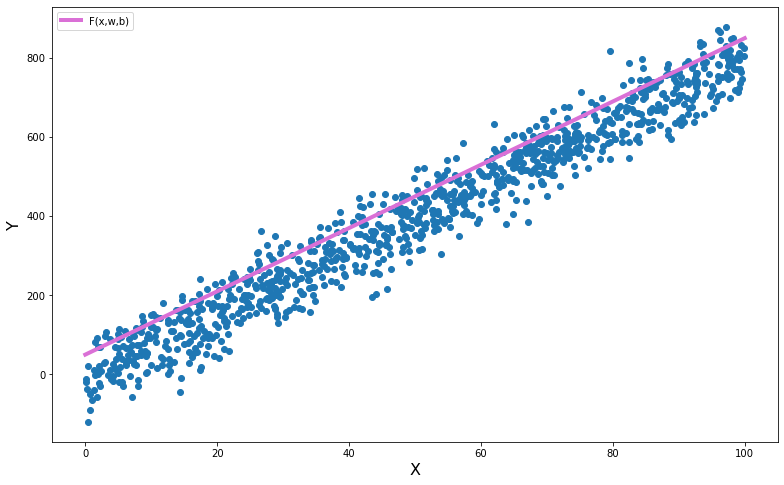

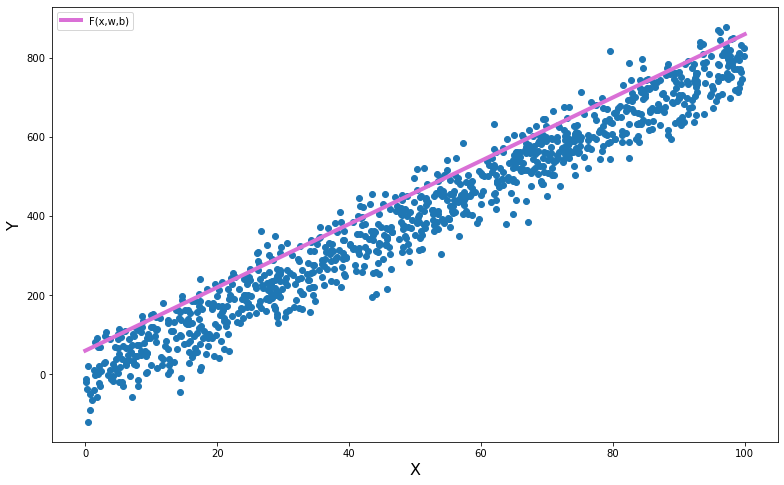

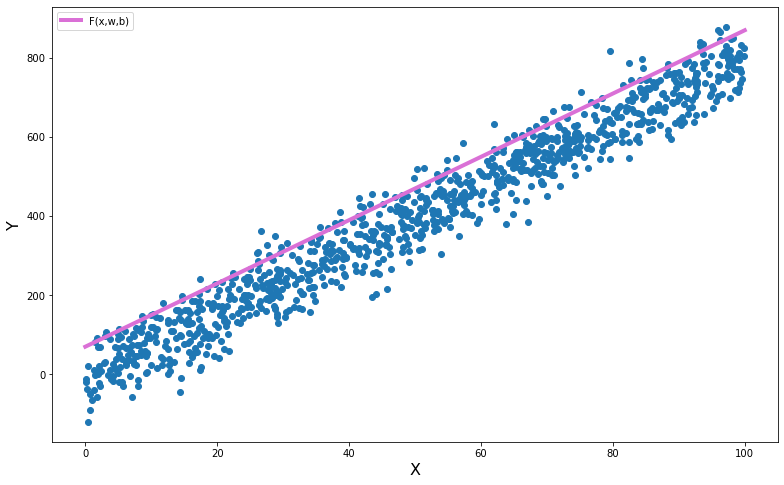

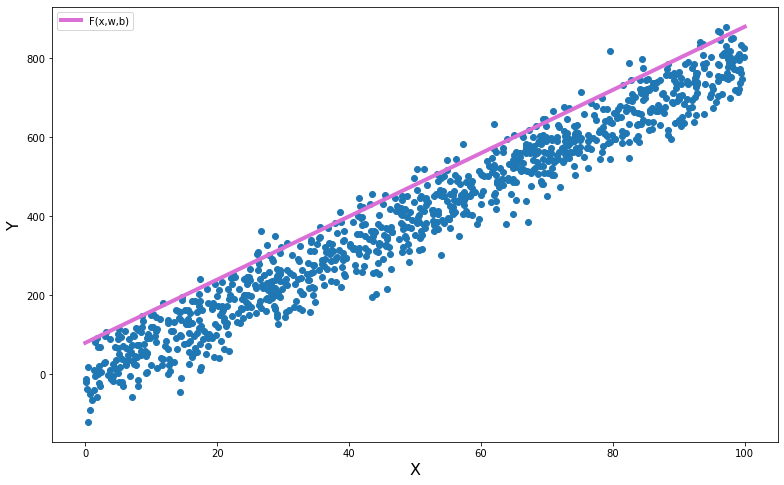

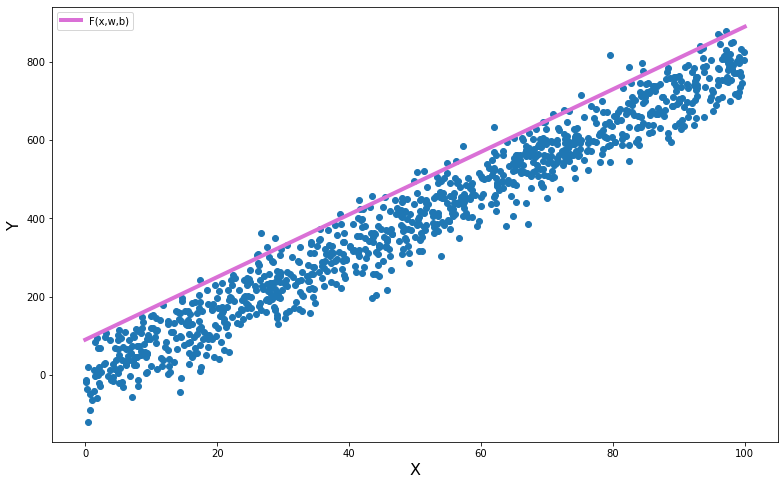

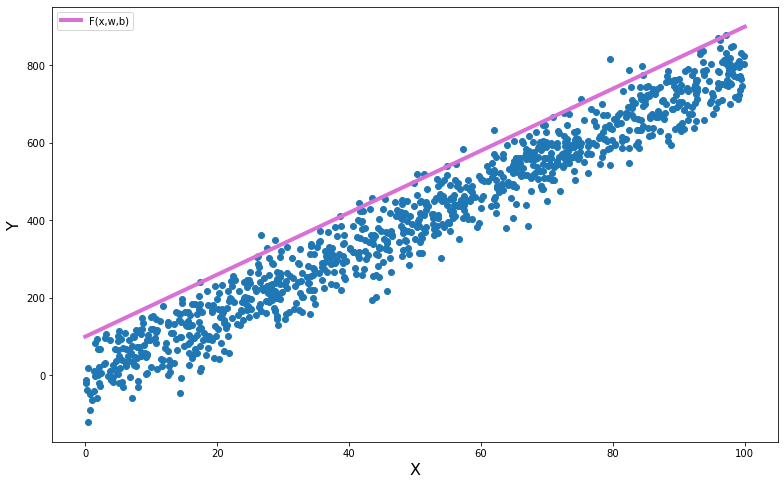

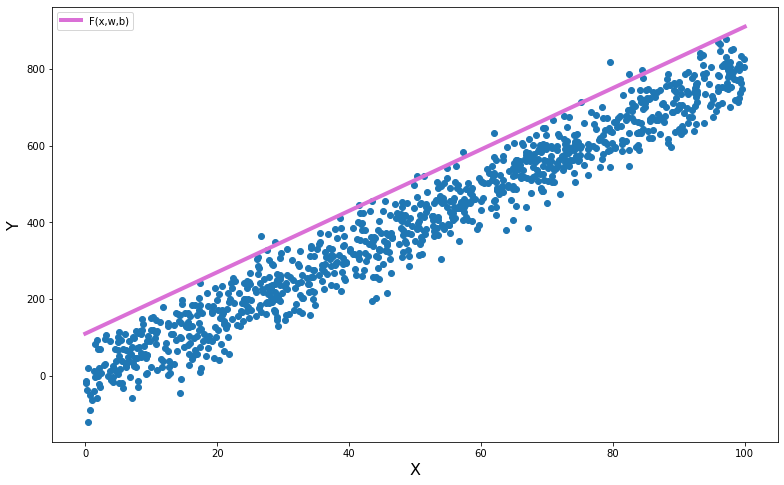

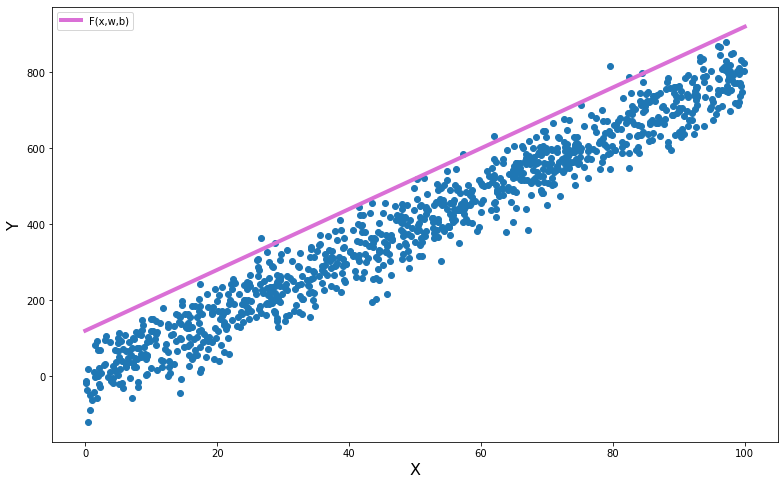

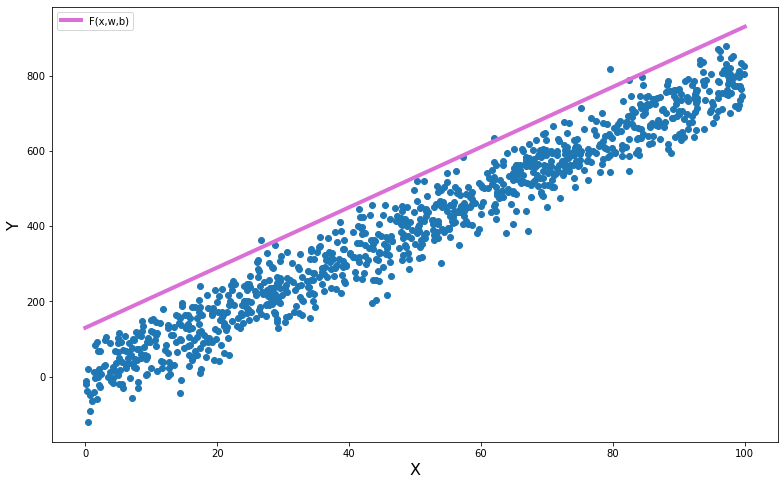

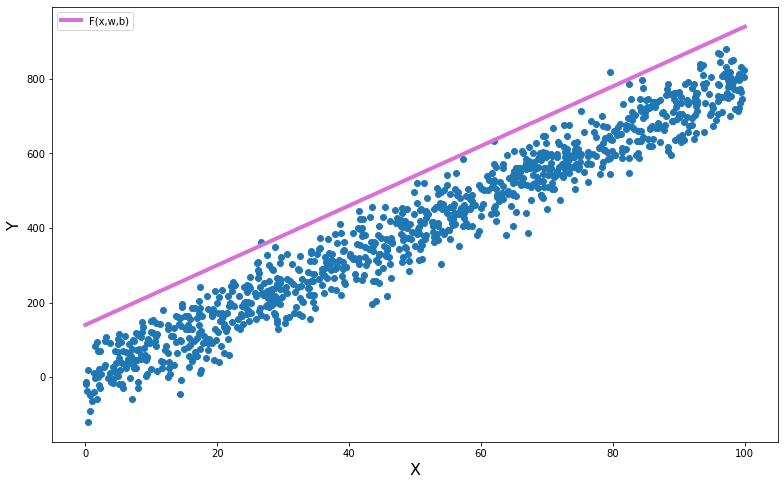

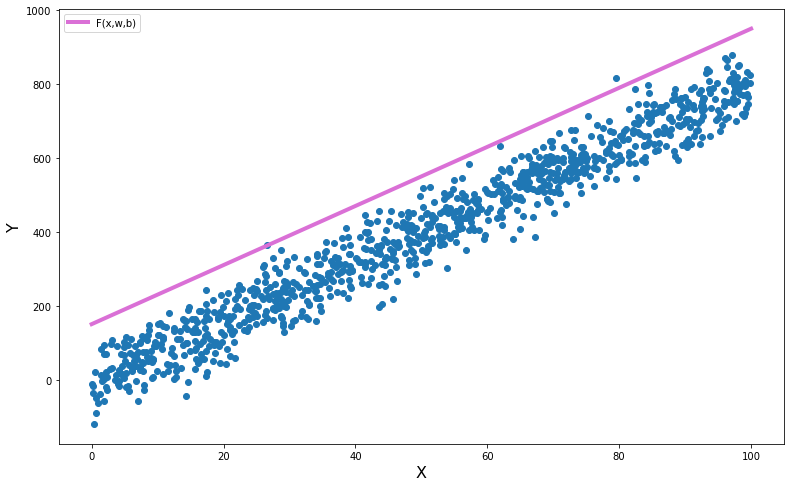

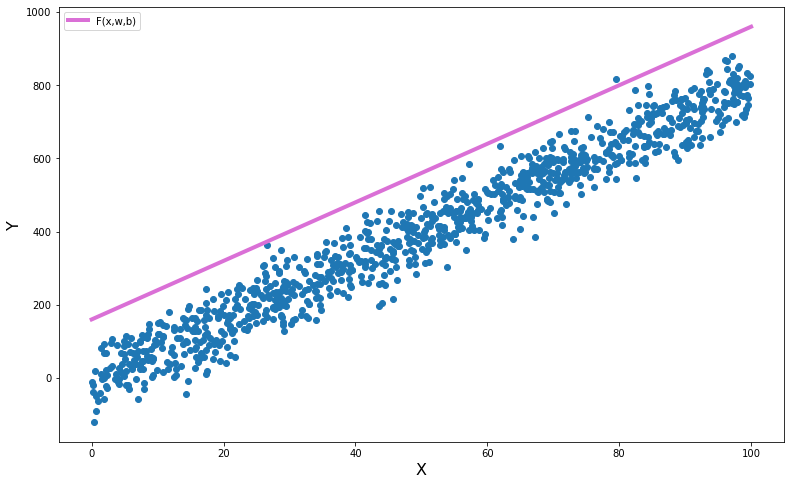

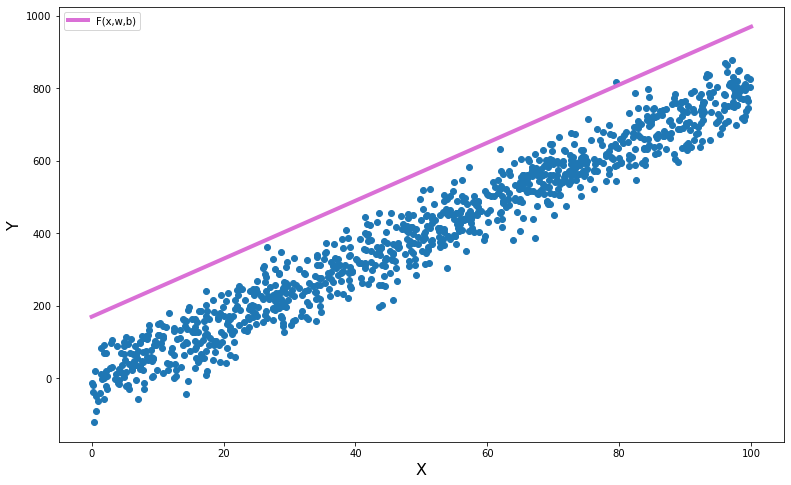

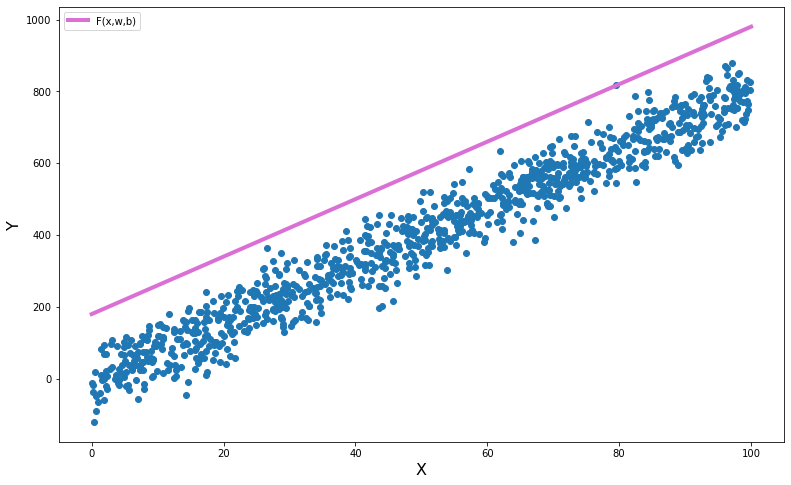

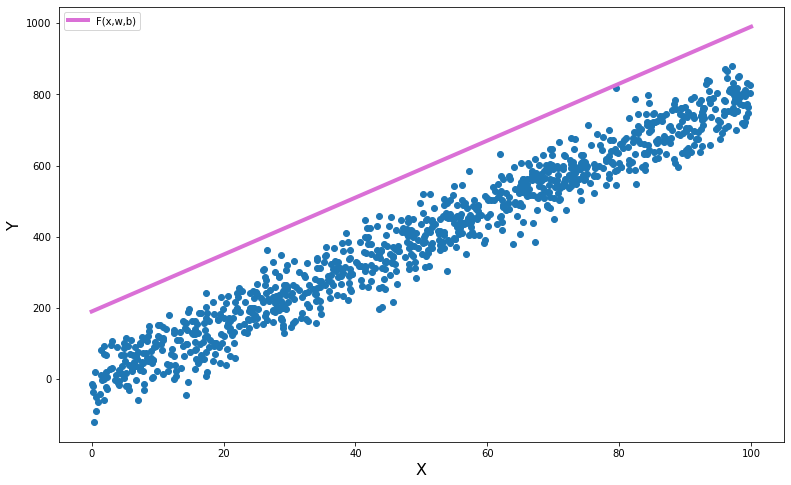

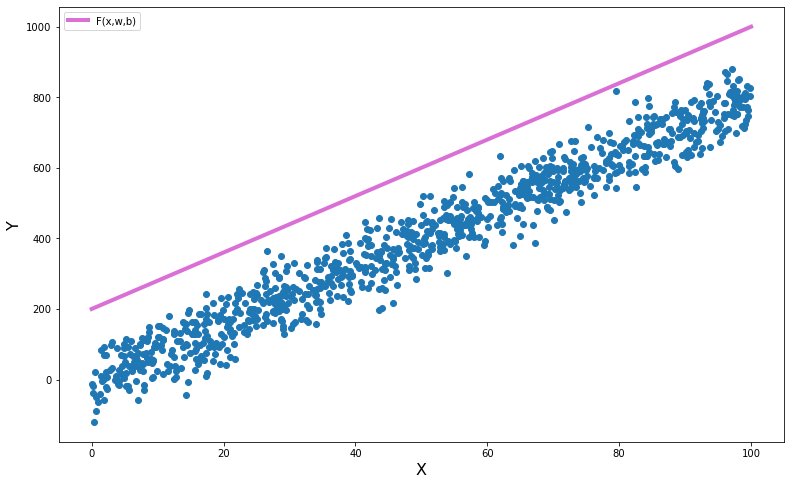

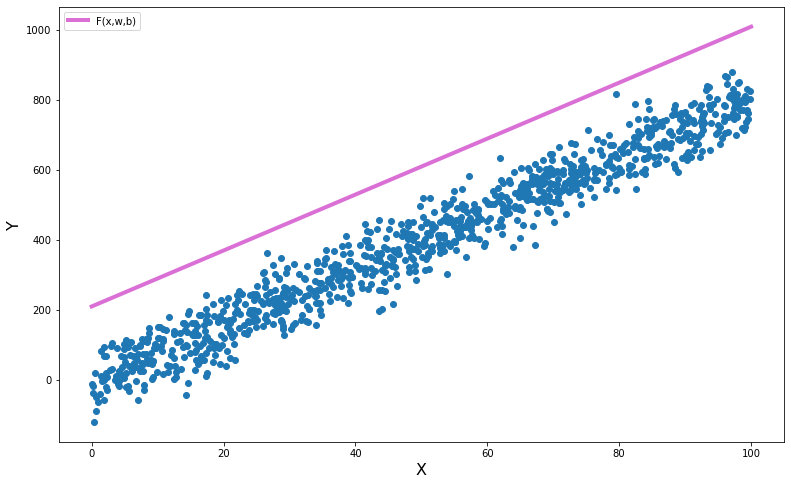

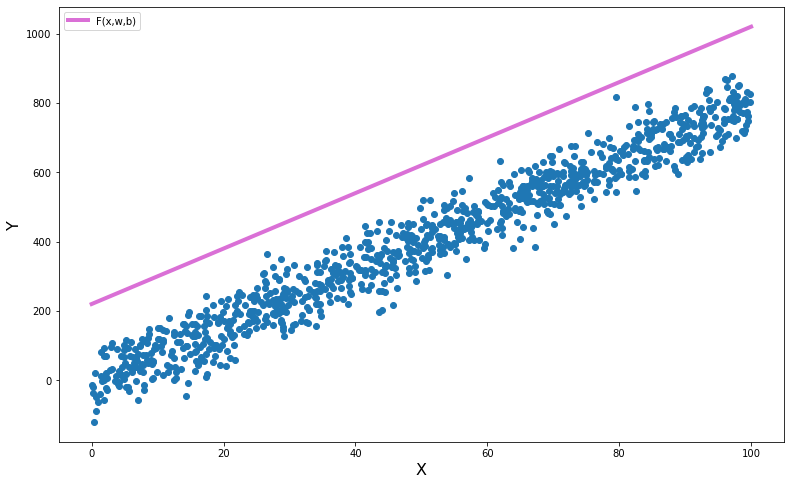

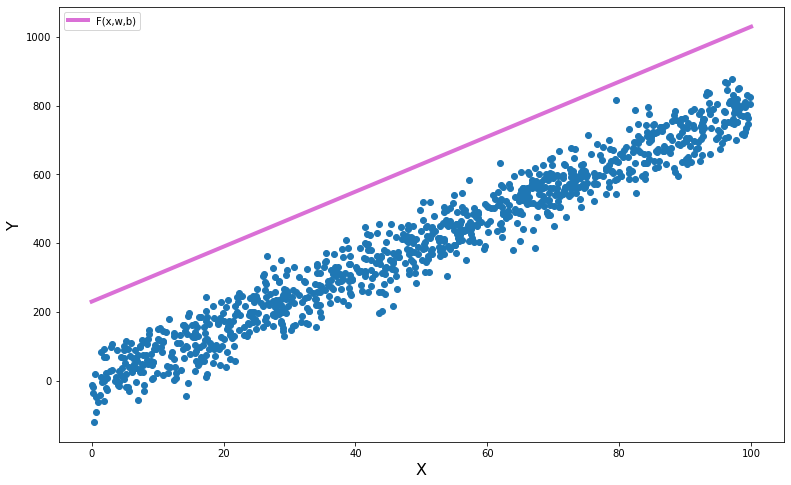

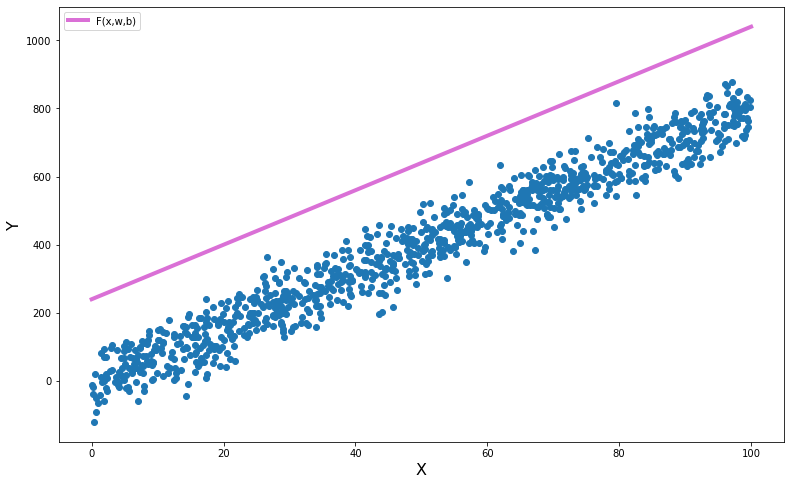

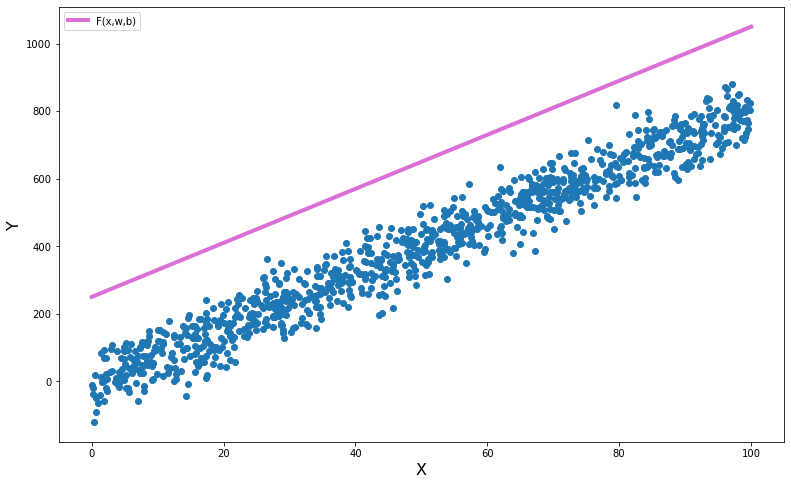

In [25]:
parameters = []

weight_0 = 8.0
bias = -250
for i in range(50):
    
    weight, bias, residuo = update_weights_biases(weight_0, bias, 0, 10.0)
    
    parameters.append([weight, bias, residuo])

    print('weight: {0:10.2f} bias: {1:10.2f} residuo: {2:10.2f}'.format(weight,bias, residuo))

<font size=4>

Graficamos algunas de las funciones obtenidas:

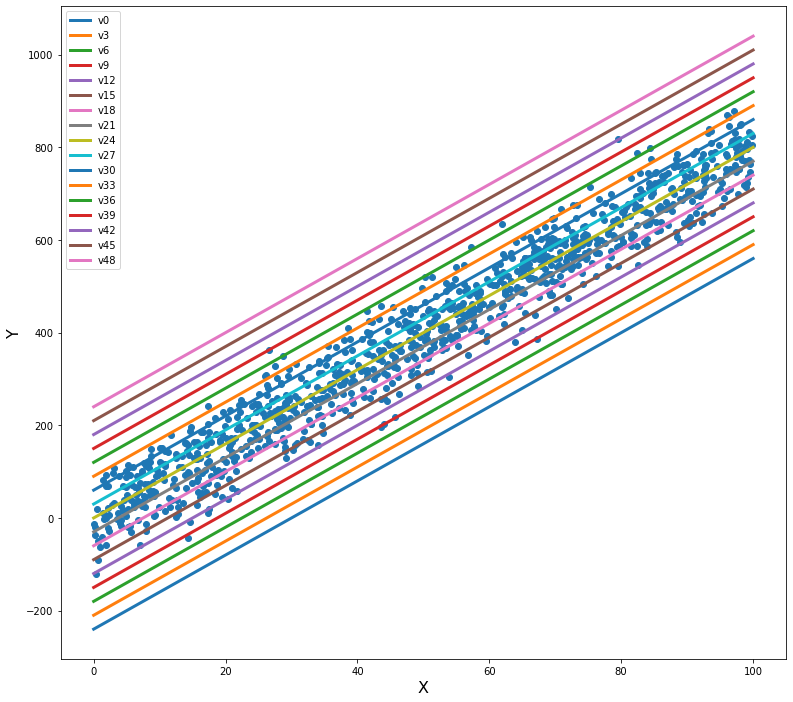

In [26]:
plt.figure(figsize=(13,12))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,50,3):
    plt.plot(x_, weight_0*x_ + parameters[i][1], label='v' + str(i), lw=3)
    plt.legend()

plt.scatter(x, y);

<font size=4>

A continuación se grafica el residuo en función de b (ordenada al origen).
 
El valor óptimo de b es aquel que minimiza al residuo.

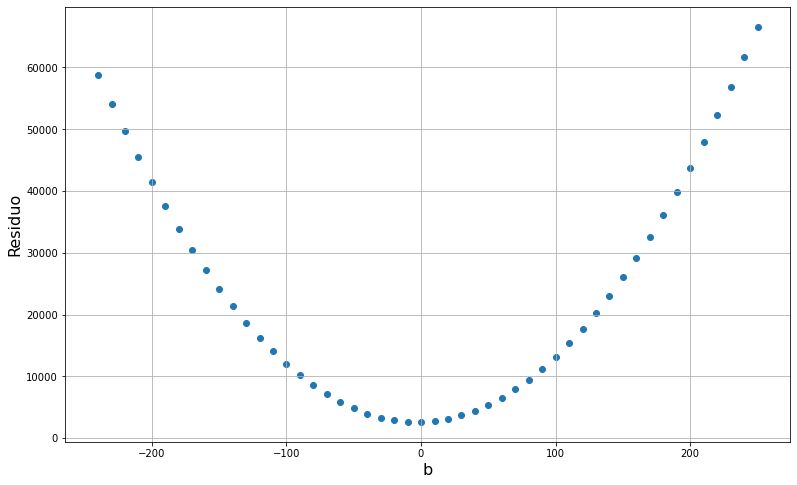

In [27]:
plt.figure(figsize=(13,8))
plt.ylabel('Residuo', fontsize=16)
plt.xlabel('b', fontsize=16)
plt.grid(True)

bias = []
residuos = []

for i in parameters:
    bias.append(i[1])
    residuos.append(i[2])
    
plt.scatter(bias, residuos);

<font size = 4>

Como se observa en la grafica el mínimo del bias b esta alrededor de cero.

In [28]:
index_min = np.argmin(residuos)

print('El residuo mas pequeño tiene indice: {0:10.2f}'.format(parameters[index_min][2]))
print('Los valores optimos de los parámetros son w = {0:5.2f} y b = {1:5.2f} '.format(parameters[index_min][0], parameters[index_min][1]))


El residuo mas pequeño tiene indice:    2595.14
Los valores optimos de los parámetros son w =  8.00 y b =  0.00 


In [29]:
type(residuos)

list

In [30]:
residuos_array = np.asarray(residuos)
type(residuos_array)

numpy.ndarray

<font size=4>
Calculamos el gradiente:

In [31]:
residuos_grad = np.gradient(residuos_array)
residuos_grad

array([-4639.60132084, -4539.60132084, -4339.60132084, -4139.60132084,
       -3939.60132084, -3739.60132084, -3539.60132084, -3339.60132084,
       -3139.60132084, -2939.60132084, -2739.60132084, -2539.60132084,
       -2339.60132084, -2139.60132084, -1939.60132084, -1739.60132084,
       -1539.60132084, -1339.60132084, -1139.60132084,  -939.60132084,
        -739.60132084,  -539.60132084,  -339.60132084,  -139.60132084,
          60.39867916,   260.39867916,   460.39867916,   660.39867916,
         860.39867916,  1060.39867916,  1260.39867916,  1460.39867916,
        1660.39867916,  1860.39867916,  2060.39867916,  2260.39867916,
        2460.39867916,  2660.39867916,  2860.39867916,  3060.39867916,
        3260.39867916,  3460.39867916,  3660.39867916,  3860.39867916,
        4060.39867916,  4260.39867916,  4460.39867916,  4660.39867916,
        4860.39867916,  4960.39867916])

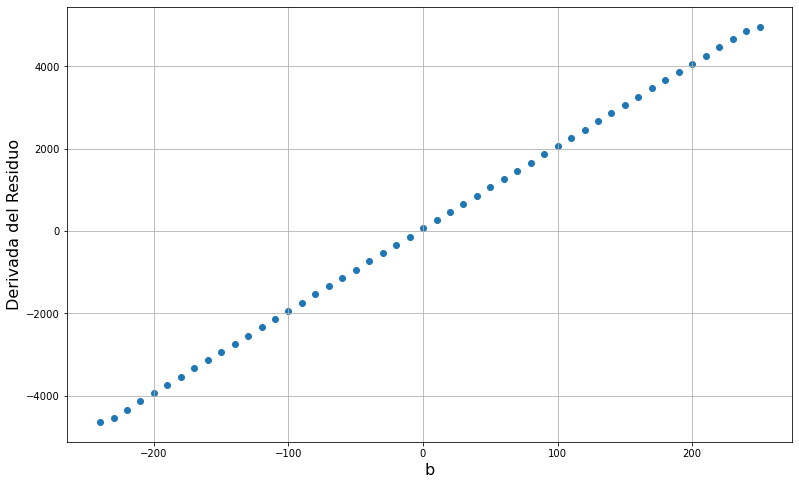

In [32]:
plt.figure(figsize=(13,8))
plt.ylabel('Derivada del Residuo', fontsize=16)
plt.xlabel('b', fontsize=16)
plt.grid(True)

bias = []
residuos = []

for i in parameters: 
    bias.append(i[1])
    residuos.append(i[2])
    
plt.scatter(bias, residuos_grad);

<font size=4>

En este caso el residuo es una parábola, su derivada entonces es una recta. En general el residuo tendrá una forma muy diferente al de una parábola

<font size = 4>

Se grafica la recta empleando los valores óptimos $ \hat w$ y $\hat b$.

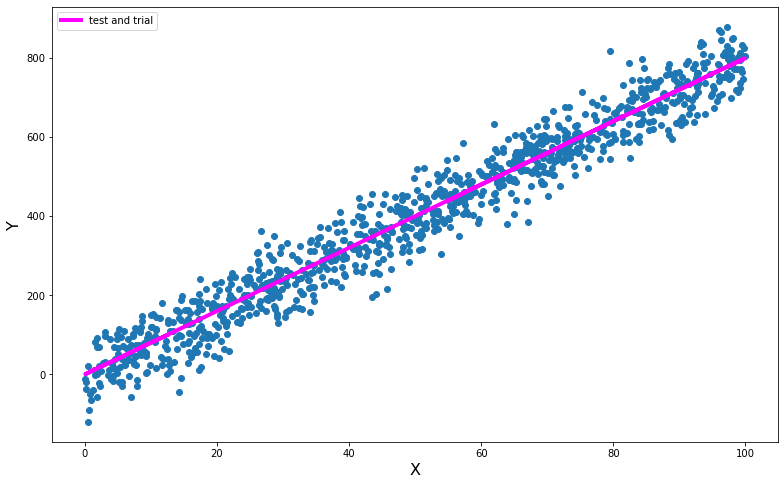

In [33]:
plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.plot(x, parameters[np.argmin(residuos)][0]*x+parameters[np.argmin(residuos)][1], color='magenta', label='test and trial', lw=4)
plt.legend()

plt.scatter(x, y);

___

<font color = 'blue' size = 4>

> ### c) Método simple de mínimos cuadrados, de acuerdo a Gauss

<font size=4>

El método de mínimos cuadrados nos permite encontrar una función que describe la correlación que tienen un conjunto m de puntos (X, Y).


El objetivo del algoritmo es obtener la relación entre un conjunto de variables independientes X y la variable dependiente Y.

En el presente caso, se propone una función lineal para describir la correlación:

$$ F(x_i) = b + w x_i $$
 

Las variables b  y w definen a la función F. 

Con el método simple de mínimos cuadrados se hallan los valores óptimos $\hat{b}$ y $\hat{\omega}$ de estas variables.

<font size = 4>

La diferencia entre el valor real $y_i$ y el valor estimado $F(x_i)$ se denomina $r_i$:

$$ r_i = y_i - F(x_i) $$

El objetivo del método de mínimos cuadrados es minimizar la suma del cuadrado de los residuos, es decir, minimizar a:

$$ Residuo = \dfrac {1}{m} ∑_{i=1}^{m}r_{i}^{2} $$

Derivando parcialmente con respecto a los parámetros e igualando a cero se obtiene que:

$$ \dfrac{∂Residuo}{∂\hat{w}} =0⟶\hat{\omega}=\dfrac{∑_{i=1}^{n}(x_i–\bar x)(y_i–\bar y)}{∑_{i=1}^{m}(x_i–\bar x)^2}$$


$$ \dfrac{∂Residuo}{∂\hat{b}}=0⟶\hat{b}=y–\hat w x $$

en donde $\bar x$ y $\bar y$ son los promedios de las muestras.

La siguiente función realiza las operaciones anteriores:

In [34]:
def mean_square_error(x, y):
    
    # 1) Se obtiene el promedio de los valores x_i y y_i

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # 2) se calcula (x_i-x) y (y_i-y), con x e y los promedios de x_i e y_i, respectivamente.

    x_i = []
    for i in x:
        x_i.append(np.squeeze(i) - mean_x)

    y_i = []
    for i in y:
        y_i.append(np.squeeze(i) - mean_y)

    # 3) se calcula (x_i-x)*(x_i-x)

    x_i2 = np.power(x_i, 2)

    # 4) se hacen las sumas correspondientes

    xy_sum = 0

    for i in range(len(x_i)):
        xy_sum += x_i[i]*y_i[i]
    x2_sum = 0

    for i in range(len(x_i)):
        x2_sum += x_i2[i]

    # Se definen a w y b 

    w = xy_sum/x2_sum
    b = mean_y - w*mean_x
       
    return w, b

<font size=4>
    
Se observan las $\hat{b}$ y $\hat{\omega}$ óptimas:

In [35]:
w, b = mean_square_error(x, y)
print(" w = {0:5.2f}, b = {1:5.2f}".format(w,b))

 w =  8.07, b = -6.37


<font size=4>
    
Se grafica la función f con las $\hat{b}$ y $\hat{\omega}$ óptimas:

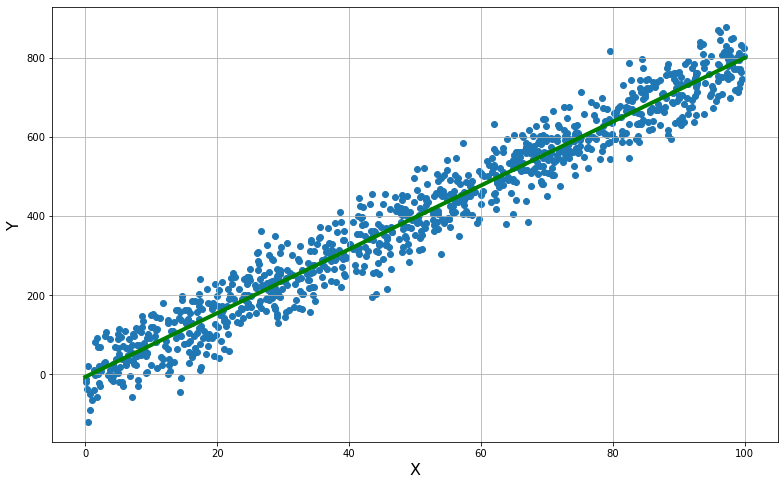

In [36]:
x_ = np.array([0, 100])

y_MSE = x_*w + b

plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)

plt.plot(x_, y_MSE, color='green', lw=4)

plt.scatter(x, y);

<font size=4>
    
El 'error' encontrado es:

In [37]:
MSE= 0

for i in range(len(x)):
    r = (y[i]-w*x[i] + b)**2
    MSE += np.squeeze(r)
MSE = MSE / len(x)

print('MSE: {0:10.2f}'.format(MSE))

MSE:    2744.71


<font size=4>
    
Comparamos las funciones obtenidas con el método b)(hallar el residuo mínimo a mano) y el método c) (mínimos cuadrados):

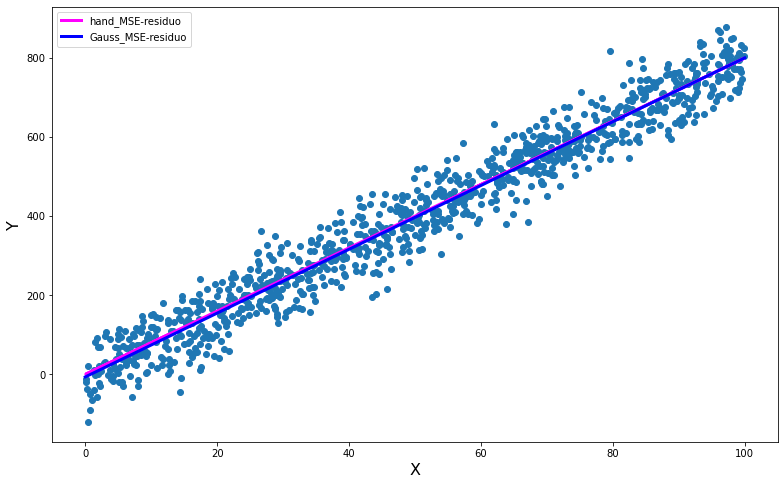

In [38]:
plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)


plt.plot(x, parameters[np.argmin(residuos)][0]*x+parameters[np.argmin(residuos)][1], color='magenta', label='hand_MSE-residuo', lw=3)
plt.plot(x_, y_MSE, color='blue', label = 'Gauss_MSE-residuo', lw=3)
plt.legend()

plt.scatter(x, y);

___

<font size =4 color='blue'>
    
> ### d) Determinación de la función que describe la correlación entre los datos empleando el método de Newton-Raphson
 

<font size=4>

El método de Newton-Rapshon se usa para encontrar las raíces de una función real. 

Se parte de la derivada de la función $f$ y una suposición inicial $x_0$ para una raíz de $f$. Si la función satisface suposiciones suficientes y la suposición inicial es cercana, entonces se mejora la aproximación de la raíz con:

$$ x_1 = x_0 - \dfrac{f(x_0)}{f´(x_0)}$$

$(x_1, 0)$ es la intersección del eje $x$ y la tangente de la gráfica de $f$ en $(x_0, f(x_0))$.

[Newton´s method](https://en.wikipedia.org/wiki/Newton%27s_method)


<img src = "images/NewtonIteration_Ani.gif">

(By Ralf Pfeifer - de:Image:NewtonIteration Ani.gif, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2268473)

<font size =4>

Si el método se aplica a la derivada de una funcion $f$, es decir, se aplica a $f'$, entonces se pueden hallar los mínimos o máximos de $f$. 

[Newton´s method in optimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization#Newton's_Method)

In [39]:
def newton_raphson(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function 
    Df : Derivative of f(x).
    x0 : Initial guess for finding the root of f(x).
    epsilon :Stopping criteria: the iteration ends when abs(f(x)) < epsilon.
    max_iter : Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    '''
    
    aprox_root = [x0]  # en esta lista se van guardando las aproximaciones a la raíz
    xn = x0
      
    # xn es la aproximación de la raíz de f. Inicialmente xn =x0 con x0 la primera aproximación
    
    for n in range(0,max_iter):
        fxn = f(xn)
        print("xn = ", xn, "aprox_root = ", aprox_root)
        
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn, aprox_root
        
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        
        print("fxn = ", fxn, "Dfxn = ", Dfxn)
        
        xn = xn - fxn/Dfxn
        aprox_root.append(xn)
        
    print('Exceeded maximum iterations. No solution found.')
    
    return None

<font size=4>
    
    Ejemplo:
    
 Se define una función $p(x)=x^3-27$ y su derivada $Dp(x)=3x^2$:

In [40]:
#p = lambda x: x**3-27

def p(x):
    return x**3-27

#Dp = lambda x: 3*x**2 

def Dp(x):
    return 3*x**2

<font size=4>

 Se grafica la función $p(x)=x^3-27$

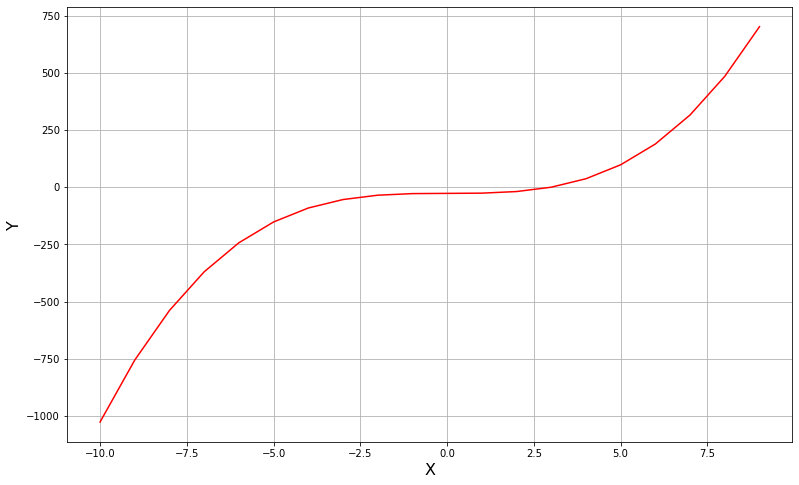

In [41]:
x_ = np.arange(-10, 10)
y_ = p(x_)

plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)

plt.plot(x_, y_, color='r');

#print(y_)

<font size=4>
    
Se usa Newton-Raphson para hallar las raíces:

In [42]:
newton_raphson(p,Dp,7.5,0.001,50)

xn =  7.5 aprox_root =  [7.5]
fxn =  394.875 Dfxn =  168.75
xn =  5.16 aprox_root =  [7.5, 5.16]
fxn =  110.38809600000002 Dfxn =  79.8768
xn =  3.77802055164954 aprox_root =  [7.5, 5.16, 3.77802055164954]
fxn =  26.925346975378808 Dfxn =  42.820317866058886
xn =  3.149222160670735 aprox_root =  [7.5, 5.16, 3.77802055164954, 3.149222160670735]
fxn =  4.232726384866993 Dfxn =  29.752800651778955
xn =  3.0069590361196714 aprox_root =  [7.5, 5.16, 3.77802055164954, 3.149222160670735, 3.0069590361196714]
fxn =  0.18833016589804075 Dfxn =  27.12540793470523
xn =  3.000016092944351 aprox_root =  [7.5, 5.16, 3.77802055164954, 3.149222160670735, 3.0069590361196714, 3.000016092944351]
Found solution after 5 iterations.


(3.000016092944351,
 [7.5,
  5.16,
  3.77802055164954,
  3.149222160670735,
  3.0069590361196714,
  3.000016092944351])

<font size=4>
    
Función para graficar la tangente:

In [43]:
def tangent_line(f, Df, x_0, a, b):
        
    x = np.linspace(a,b)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = Df(x_0) * (x - x_0) + y_0 
    
    plt.figure(figsize=(13,8))
    plt.ylabel('Y', fontsize=16)
    plt.xlabel('X', fontsize=16)

    plt.plot(x,y,'r-')
    plt.plot(x,y_tan,'b-')
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.grid(True)
    
    plt.title('Plot of a function with tangent line');

xn =  7.5 aprox_root =  [7.5]
fxn =  394.875 Dfxn =  168.75
xn =  5.16 aprox_root =  [7.5, 5.16]
fxn =  110.38809600000002 Dfxn =  79.8768
xn =  3.77802055164954 aprox_root =  [7.5, 5.16, 3.77802055164954]
fxn =  26.925346975378808 Dfxn =  42.820317866058886
xn =  3.149222160670735 aprox_root =  [7.5, 5.16, 3.77802055164954, 3.149222160670735]
fxn =  4.232726384866993 Dfxn =  29.752800651778955
xn =  3.0069590361196714 aprox_root =  [7.5, 5.16, 3.77802055164954, 3.149222160670735, 3.0069590361196714]
fxn =  0.18833016589804075 Dfxn =  27.12540793470523
xn =  3.000016092944351 aprox_root =  [7.5, 5.16, 3.77802055164954, 3.149222160670735, 3.0069590361196714, 3.000016092944351]
Found solution after 5 iterations.


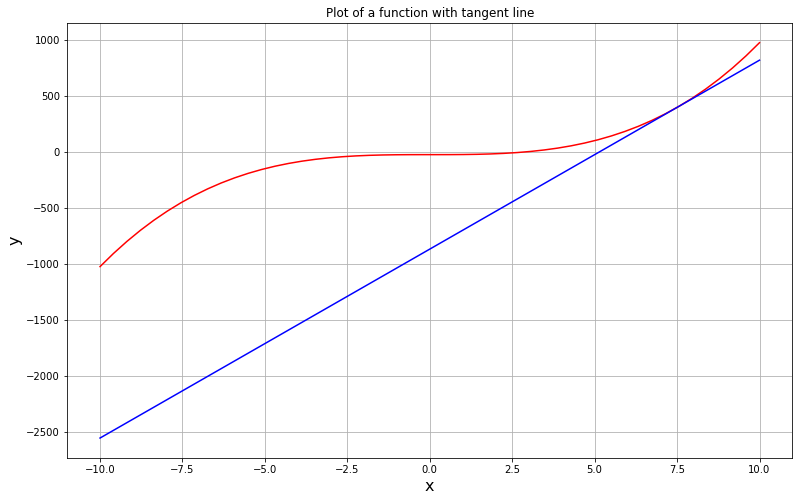

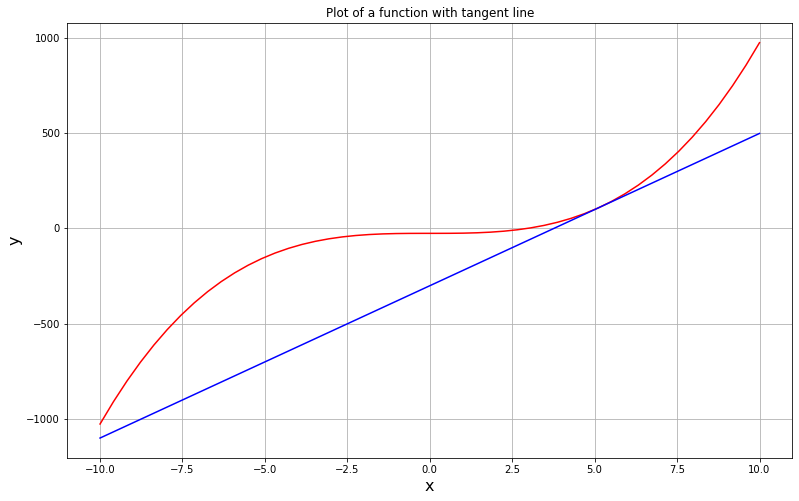

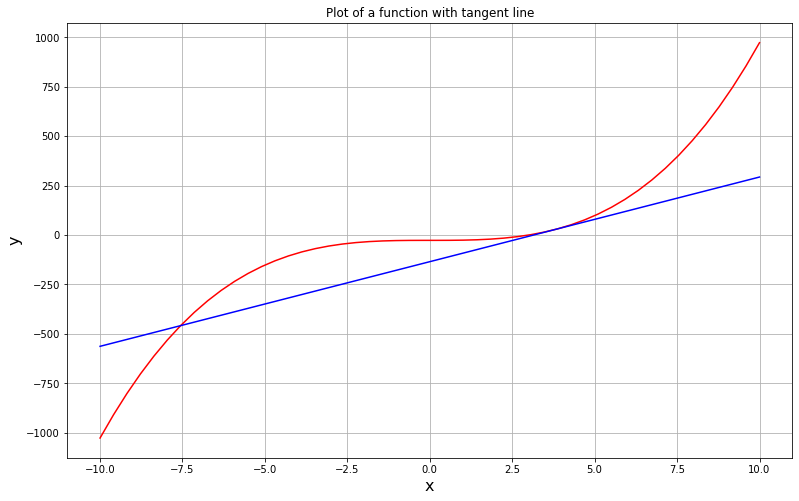

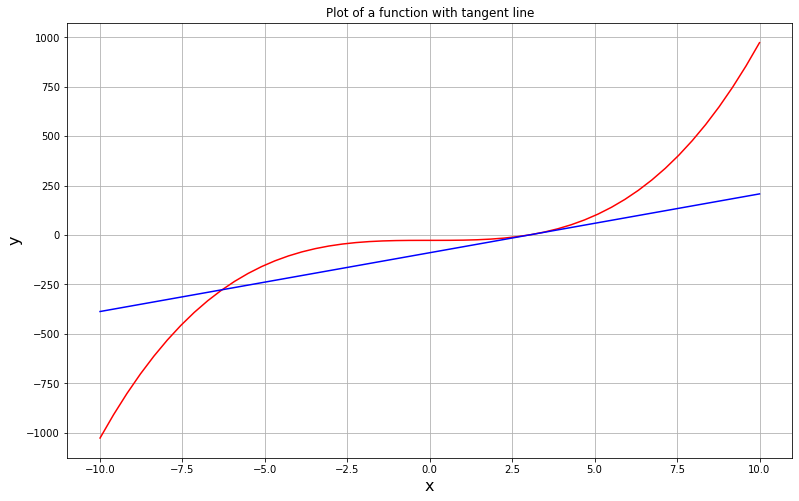

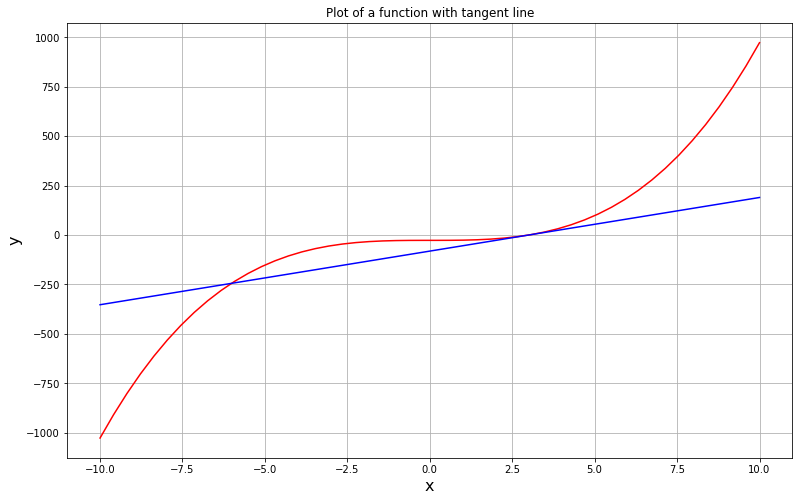

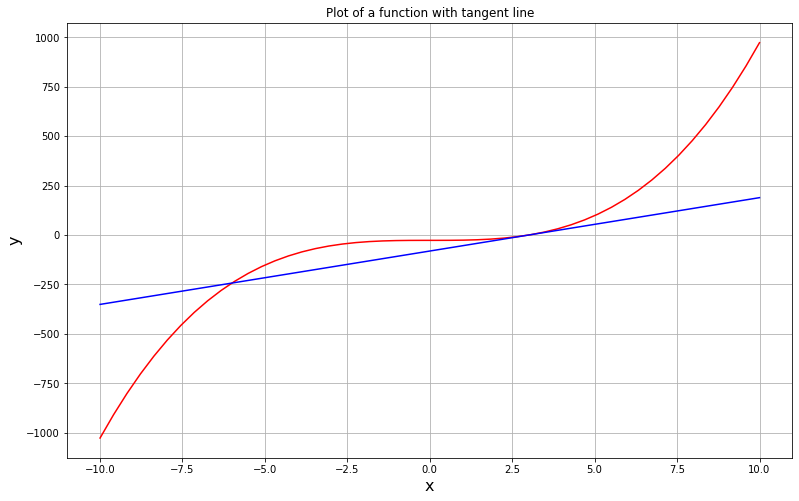

In [44]:
for i in newton_raphson(p,Dp,7.5,0.01,50)[1]:

    tangent_line(p, Dp, i, -10, 10)

<font size=4>
    
 Ahora sí, aplicado a nuestro problema:

In [45]:
# the function zip() join a sequences (string, list or tuples) 
# match the corresponding indexes in each sequence


# in this case: 

#x = (x1, x2, ..., xm)
#y = (y1, y2, ..., ym)

#then

# zip(x, y) = (x1,y1), (x2, y2), ...(x3, y3)

# D_residuo es la derivada del residuo.

print(w)

#D_residuo = lambda w: (1/m)*(np.sum([2*(w*i+b-j)*i for i, j in zip(x,y)]))

def D_residuo(w):
    
    
    r = 0
    
    for i, j in zip(x, y):
        #print("i= ", i )
        r += 2*(w*i+b-j)*i
        #print("i= ", i, "loss = ", r )
    r = r/m
    print("D_residuo = ", r)
    #s = np.sum([2*(w*i+b-j)*i for i, j in zip(x,y)])
    
    return r
    

#Hay que buscar los ceros de D_residuo con respectp de w


#DD_residuo es la derivada de D_residuo con respecto a w

#DD_residuo = lambda w: (1/m)*np.sum([2*i*i for i in x])

def DD_residuo(w):
    
    r = 0
    for i, j in zip(x, y):
        r += 2*i*i
    r = r/m
    print("DD_residuo", r)
        
    return r


newton_raphson(D_residuo, DD_residuo,2,0.01,100)

8.066318723657108
D_residuo =  [-40716.8108297]
xn =  2 aprox_root =  [2]
DD_residuo [6711.94717662]
fxn =  [-40716.8108297] Dfxn =  [6711.94717662]
D_residuo =  [4.85244982e-11]
xn =  [8.06631872] aprox_root =  [2, array([8.06631872])]
Found solution after 1 iterations.


(array([8.06631872]), [2, array([8.06631872])])

In [ ]:
#Hay que graficar D_residuo para mostrar la presencia de su cero

D_residuo =  [-34004.86365308 -27292.91647647 -20580.96929985 -13869.02212324
  -7157.07494662   -445.12777001   6266.81940661  12978.76658322
  19690.71375984  26402.66093645  33114.60811307  39826.55528969]


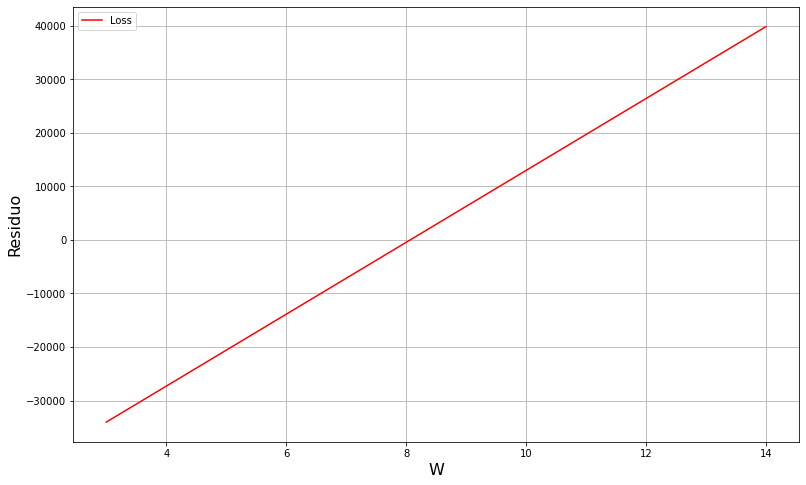

In [46]:
x_ = np.arange(3, 15)
y_ = D_residuo(x_)

plt.figure(figsize=(13,8))
plt.ylabel('Residuo', fontsize=16)
plt.xlabel('W', fontsize=16)
plt.grid(True)

plt.plot(x_, y_, color='r', label="Loss")
plt.legend();

D_residuo =  [-40716.8108297]
xn =  2 aprox_root =  [2]
DD_residuo [6711.94717662]
fxn =  [-40716.8108297] Dfxn =  [6711.94717662]
D_residuo =  [4.85244982e-11]
xn =  [8.06631872] aprox_root =  [2, array([8.06631872])]
Found solution after 1 iterations.
D_residuo =  [-121260.17694908 -118520.60667292 -115781.03639675 -113041.46612058
 -110301.89584441 -107562.32556824 -104822.75529207 -102083.1850159
  -99343.61473973  -96604.04446356  -93864.47418739  -91124.90391122
  -88385.33363505  -85645.76335888  -82906.19308271  -80166.62280654
  -77427.05253037  -74687.4822542   -71947.91197803  -69208.34170186
  -66468.77142569  -63729.20114952  -60989.63087335  -58250.06059718
  -55510.49032102  -52770.92004485  -50031.34976868  -47291.77949251
  -44552.20921634  -41812.63894017  -39073.068664    -36333.49838783
  -33593.92811166  -30854.35783549  -28114.78755932  -25375.21728315
  -22635.64700698  -19896.07673081  -17156.50645464  -14416.93617847
  -11677.3659023    -8937.79562613   -6198.2

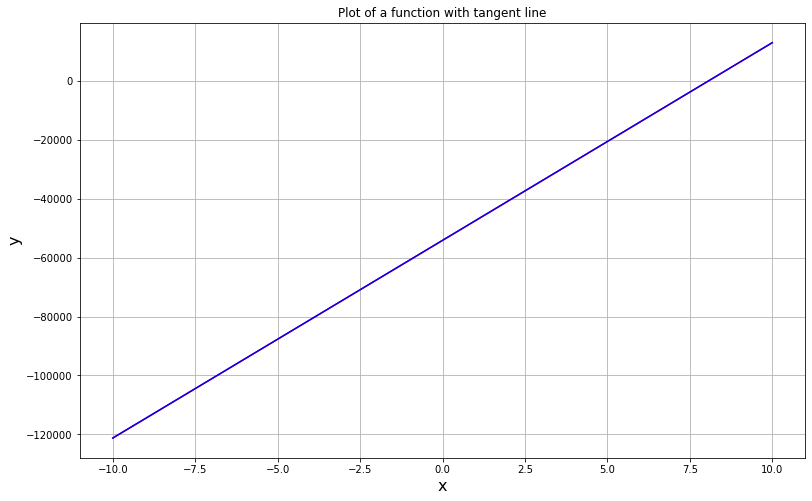

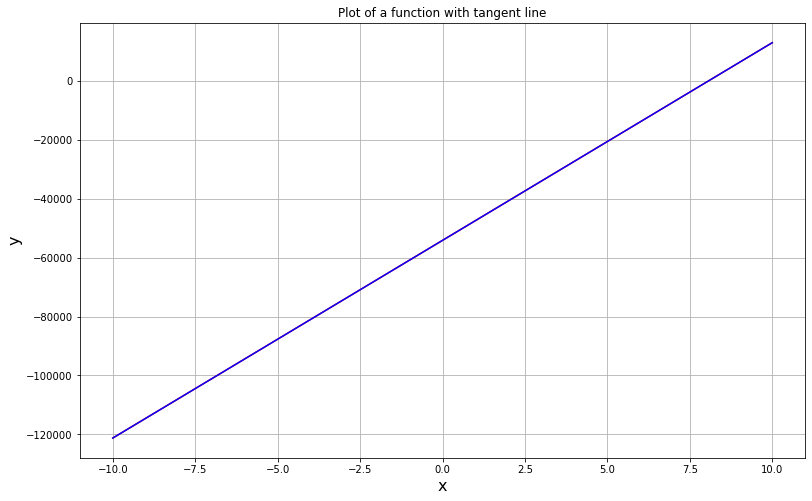

In [47]:
for i in newton_raphson(D_residuo, DD_residuo,2,0.001,100)[1]:
    tangent_line(D_residuo, DD_residuo, i, -10, 10)

___

<font size=4>
    
  **Comparación**
  
  Se compara la pendiente encontrada usando 
  
  - la recta ajustada a prueba y error (handSE), 
  
  - usando mínimos cuadrados (MSE) y 
  
  - usando el método de Newton-Rapshon (N-R).


| handSE | MSE | N-R| 
| --- | --- | --- | 
| 6.8 | 8.07 | 8.07 |

___

<font size = 4>
    
    NOTA:

En muchos casos, en lugar del residuo MSE, se emplea su raíz: RMSE


$$ RMSE =  \dfrac {1}{m} \sqrt {∑_{i=1}^{m}(f(x_i)-y_i)^{2}} $$

En algunos otros casos se usa la siguiente relación para el residuo:

$$ RMSE(weighted) = \dfrac {1}{m} \sqrt { ∑_{i=1}^{m}\frac{(f(x_i)-y_i)^{2}}{y_i}} $$